<a href="https://colab.research.google.com/github/ParbatiDebbarma/Insurance_Cost_Prediction/blob/main/Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Insurance Cost Prediction**

## **Problem Statement**

Insurance companies need to accurately predict the cost of health insurance for individuals to set premiums appropriately. However, traditional methods of cost prediction often rely on broad actuarial tables and historical averages, which may not account for the nuanced differences among individuals. By leveraging machine learning techniques, insurers can predict more accurately the insurance costs tailored to individual profiles, leading to more competitive pricing and better risk management.


## **Insurance Cost Prediction need**
The primary need for this project arises from the challenges insurers face in pricing policies accurately while remaining competitive in the market. Inaccurate predictions can lead to losses for insurers and unfairly high premiums for policyholders.


## **Data description**
The dataset comprises the following **11 attributes**:
- **Age**: Numeric, ranging from 18 to 66 years.
- **Diabetes**: Binary (0 or 1), where 1 indicates the presence of diabetes.
- **BloodPressureProblems**: Binary (0 or 1), indicating the presence of blood pressure-related issues.
- **AnyTransplants**: Binary (0 or 1), where 1 indicates the person has had a transplant.
- **AnyChronicDiseases**: Binary (0 or 1), indicating the presence of any chronic diseases.
- **Height**: Numeric, measured in centimeters, ranging from 145 cm to 188 cm.
- **Weight**: Numeric, measured in kilograms, ranging from 51 kg to 132 kg.
- **KnownAllergies**: Binary (0 or 1), where 1 indicates known allergies.
- **HistoryOfCancerInFamily**: Binary (0 or 1), indicating a family history of cancer.
- **NumberOfMajorSurgeries**: Numeric, counting the number of major surgeries, ranging from 0 to 3 surgeries.
- **PremiumPrice**: Numeric, representing the premium price in currency, ranging from 15,000 to 40,000.


In [ ]:
# ===== Standard Library =====
from pathlib import Path

# ===== Third-Party Libraries =====
import json
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import streamlit as st
from pyngrok import ngrok
from scipy.stats import f_oneway, ttest_ind
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from tabulate import tabulate


#warnings
import warnings
warnings.filterwarnings("ignore")

## **Exploratory Data Analysis**

In [ ]:
df = pd.read_csv('/content/insurance.csv')

In [ ]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 986
Number of columns: 11


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

Checked for missing values across all features. There were **no missing entries**.
There were **no duplicate records** in the data.



---



In [ ]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


**Insights**

1. **Age** – Customers range from 18 to 66 years old, with a median age of 42. The distribution is fairly spread out, indicating a diverse age group.
2. **Premium Price** – Premiums range from ₹15,000 to ₹40,000, with a median of ₹23,000 and an average of around ₹24,336. This suggests a slightly right-skewed distribution due to some higher premiums.
3. **Medical Conditions** – About 42% of customers have diabetes, 46% have blood pressure problems, and 18% have chronic diseases. Only \~5.6% have undergone transplants.
4. **Physical Attributes** – Average height is \~168 cm and average weight is \~77 kg, with a wide spread in weight (51–132 kg), which could be important for risk assessment.
5. **Surgeries & Family History** – Around 67% have had at least one major surgery, while 11.7% have a family history of cancer.




---



In [ ]:
df.nunique()

,0
Age,49
Diabetes,2
BloodPressureProblems,2
AnyTransplants,2
AnyChronicDiseases,2
Height,44
Weight,74
KnownAllergies,2
HistoryOfCancerInFamily,2
NumberOfMajorSurgeries,4


**Insighst**

1. **Continuous Variables** –

   * `Age` has 49 unique values, indicating a fairly granular distribution across the range.
   * `Height` (44 unique) and `Weight` (74 unique) also show continuous variation, which could be useful for predictive modeling.

2. **Binary Variables** –

   * Variables like `Diabetes`, `BloodPressureProblems`, `AnyTransplants`, `AnyChronicDiseases`, `KnownAllergies`, and `HistoryOfCancerInFamily` all have **only 2 unique values** (likely 0 and 1), making them **categorical binary features**.

3. **Categorical (Low-Cardinality) Variable** –

   * `NumberOfMajorSurgeries` has 4 unique values, suggesting it’s categorical with a small number of categories (e.g., 0–3 surgeries).

4. **Target Variable** –

   * `PremiumPrice` has 24 unique values, meaning it’s continuous but not as granular as age, height, or weight. This could influence model selection.



# **Univariate Analysis**

**Distribution of Age**

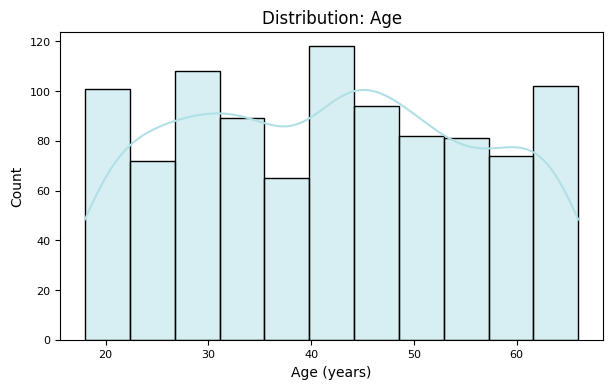

In [ ]:
# Plotting distribution of Age
plt.figure(figsize=(7,4)) #Setting the figure size

sns.histplot(df["Age"], kde=True,color= 'powderblue')
plt.title("Distribution: Age", fontsize=12)
plt.xlabel("Age (years)", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

**Inferences from Age distribution:**

1. The dataset covers a wide age range (18–66) with fairly even distribution, meaning all age groups are well represented for modeling.
2. There is a slight concentration around early 40s, suggesting a modest middle-age dominance in the dataset.
3. Younger adults (18–25) and senior individuals (60+) are present in significant numbers, allowing for age-based premium comparisons across life stages.
4. The relatively balanced age spread minimizes risk of age-related bias in the prediction model.




---



**Distribution of Height**

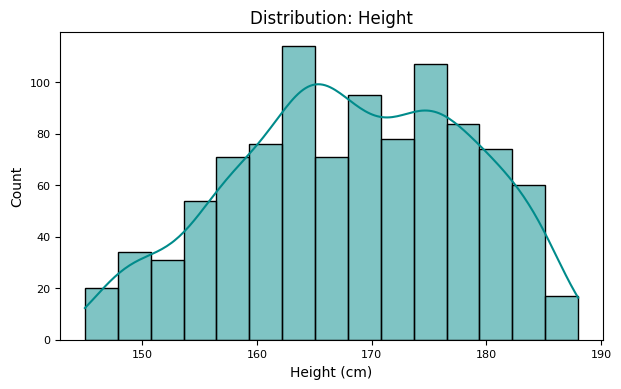

In [ ]:
# Plotting distribution of Height
plt.figure(figsize=(7,4))

sns.histplot(df["Height"], kde=True, color= 'darkcyan')
plt.title("Distribution: Height", fontsize=12)
plt.xlabel("Height (cm)", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

**Inferences from Height distribution:**

1. The height distribution appears roughly **normal**, centered around \~165–175 cm.
2. Most individuals fall between **155 cm and 180 cm**, with very few extreme values near the lower (145 cm) and upper (188 cm) bounds.
3. The balanced spread suggests minimal need for height-based data transformation or outlier removal.
4. Since height is fairly symmetrically distributed, it may not require normalization for most models, but could be useful for BMI calculation.




---



**Distribution of Weight**

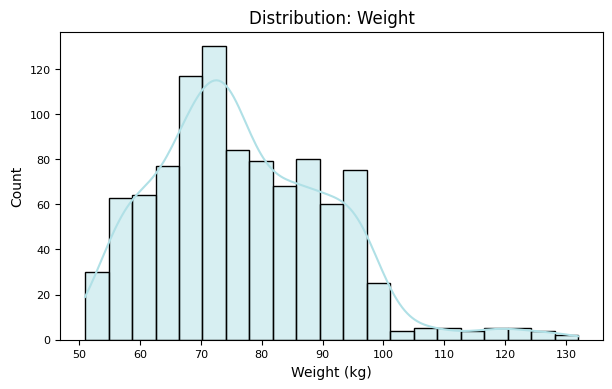

In [ ]:
# Plotting distribution of Weight
plt.figure(figsize=(7,4))

sns.histplot(df["Weight"], kde=True, color= 'powderblue')
plt.title("Distribution: Weight", fontsize=12)
plt.xlabel("Weight (kg)", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

**Inferences from Weight distribution:**

1. The distribution is slightly **right-skewed**, with most individuals weighing between **60–90 kg**.
2. The peak frequency occurs around **70–75 kg**, indicating this is the most common weight range.
3. There are a few extreme values above **110 kg**, which may be potential outliers worth reviewing.
4. Weight could influence premiums indirectly through BMI and health condition risk factors such as diabetes or blood pressure problems.




---



**Distribution of Premium Price**

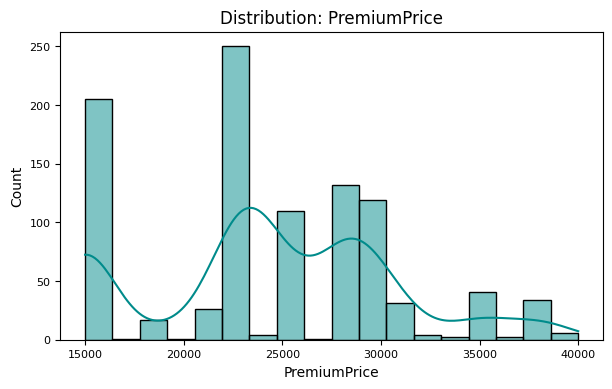

In [ ]:
# Plotting distribution of PremiumPrice
plt.figure(figsize=(7,4))

sns.histplot(df["PremiumPrice"], kde=True, color= 'darkcyan' )
plt.title("Distribution: PremiumPrice", fontsize=12)
plt.xlabel("PremiumPrice", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

**Inferences from PremiumPrice distribution:**

1. Premium prices are **clustered at certain fixed values** (e.g., \~15,000, \~23,000, \~29,000), suggesting predefined pricing tiers rather than purely continuous variation.
2. The most common premium tier is around **23,000**, followed by \~15,000 and \~29,000, indicating these might be standard policy price points.
3. There is a moderate spread from **15,000 to 40,000**, with fewer high-premium cases above 35,000.
4. The multi-modal shape implies segmentation—different groups of customers may be assigned to specific premium bands based on health and demographic profiles.




---



### **Subplots for disease-related binary variables**

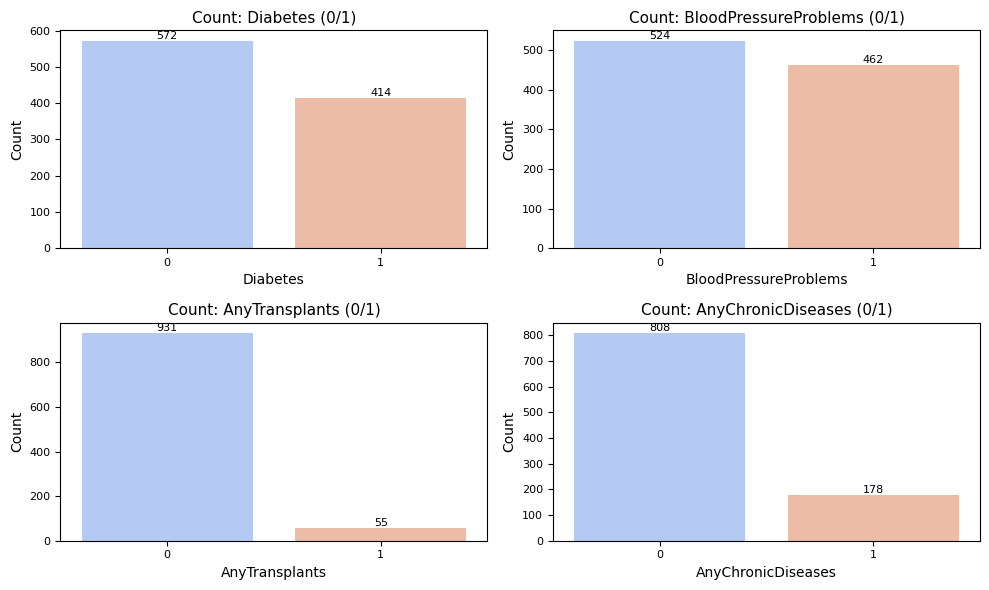

In [ ]:
# Plotting four binary variables in subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

binary_vars_1 = [
    "Diabetes",
    "BloodPressureProblems",
    "AnyTransplants",
    "AnyChronicDiseases"
]

for ax, col in zip(axes.flatten(), binary_vars_1):
    sns.countplot(x=df[col].astype("category"), palette='coolwarm', ax=ax)

    # Adding integer counts on bars
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

    # Setting titles and labels
    ax.set_title(f"Count: {col} (0/1)", fontsize=11)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()


**Inferences from health condition binary variables:**

1. **Diabetes**: 42% of individuals have diabetes, indicating a substantial portion of the population may have higher insurance risk due to this condition.
2. **BloodPressureProblems**: Present in \~47% of individuals, showing it is one of the more common health issues in the dataset.
3. **AnyTransplants**: Extremely rare (\~5.6%), suggesting it will have limited variation but potentially large cost impact for affected individuals.
4. **AnyChronicDiseases**: Around 18% of individuals have chronic diseases, making it a moderately common risk factor for premium pricing.




---



### **Subplots for allergies and family history**

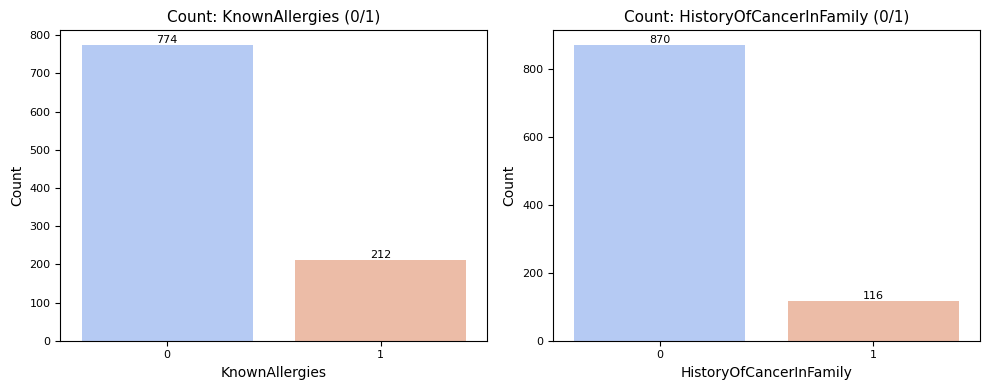

In [ ]:
# Plotting two binary variables in subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

binary_vars_2 = [
    "KnownAllergies",
    "HistoryOfCancerInFamily"
]

for ax, col in zip(axes.flatten(), binary_vars_2):
    sns.countplot(x=df[col].astype("category"), palette='coolwarm', ax=ax)

    # Adding integer counts on bars
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8)

    # Setting titles and labels
    ax.set_title(f"Count: {col} (0/1)", fontsize=11)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()


**Inferences from KnownAllergies and HistoryOfCancerInFamily:**

1. **KnownAllergies**: Around 21% of individuals have known allergies, making it a relatively less common condition compared to diabetes or blood pressure issues.
2. **HistoryOfCancerInFamily**: Only \~12% report a family history of cancer, indicating it’s the least common among recorded health risk factors.
3. The strong dominance of the “0” category in both variables suggests they may have **limited predictive power alone**, but could be important in interaction with other health factors.
4. These conditions, though less frequent, might still be associated with higher premiums for the affected subset, especially in long-term risk assessment.




---



**Number Of Major Surgeries**

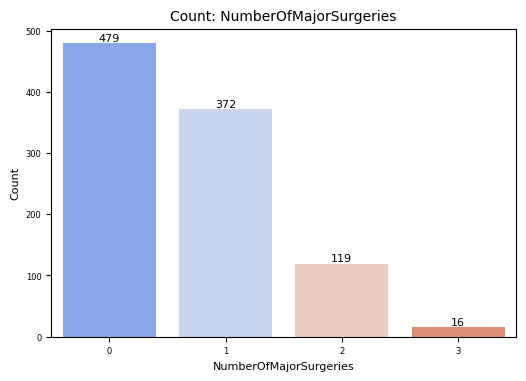

In [ ]:
# Plotting countplot of NumberOfMajorSurgeries
plt.figure(figsize=(6,4))
order = sorted(df["NumberOfMajorSurgeries"].unique())
ax = sns.countplot(x="NumberOfMajorSurgeries", data=df, order=order, palette='coolwarm')

# Adding integer counts on bars
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=8)

plt.title("Count: NumberOfMajorSurgeries", fontsize=10)
plt.xlabel("NumberOfMajorSurgeries", fontsize=8)
plt.ylabel("Count", fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

**Inferences from NumberOfMajorSurgeries:**

1. Nearly half of the individuals (48.6%) have **never undergone major surgery**, indicating a relatively healthy subset.
2. About **37.7%** have had **one major surgery**, making it the second most common category.
3. Higher surgery counts (2 or 3) are rare — only **\~13.7%** combined — but may correspond to higher insurance risk and premium costs.
4. The variable is **right-skewed**, with frequency decreasing sharply as the number of surgeries increases, suggesting limited extreme medical histories.


# **Bivariate Analysis**

### **Continuous vs Continuous (Scatterplots with regression line)**

In [ ]:
# Defining reusable regression plot function
def plot_regression(x_col, y_col, data):
    plt.figure(figsize=(7,4))
    sns.regplot(x=x_col, y=y_col, data=data,
        ci=95,                                # Showing confidence interval
        scatter_kws={'alpha': 0.5},           # Making scatter points semi-transparent
        line_kws={'color': 'red'}             # Making regression line red
    )
    plt.title(f"{y_col} vs {x_col}", fontsize=11)
    plt.xlabel(x_col, fontsize=10)
    plt.ylabel(y_col, fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()


**Premium Price vs Age**

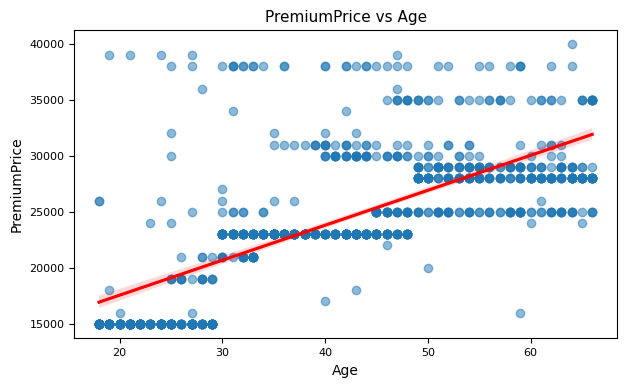

In [ ]:
plot_regression("Age", "PremiumPrice", df)

**Inferences from PremiumPrice vs Age:**

1. There is a **clear positive correlation** between age and premium price — older individuals tend to pay higher premiums.
2. Premium growth appears **gradual** with age, suggesting insurers factor in increased health risks over time.
3. Younger individuals (**<30**) mostly have premiums clustered in lower ranges (**₹15,000 - ₹25,000**), whereas seniors (**>55**) are more concentrated in higher tiers (**₹30,000+**).
4. The spread of premiums at each age indicates **other factors** (e.g., health conditions, surgeries) also influence pricing beyond just age.




---



**Premium Price vs Height**

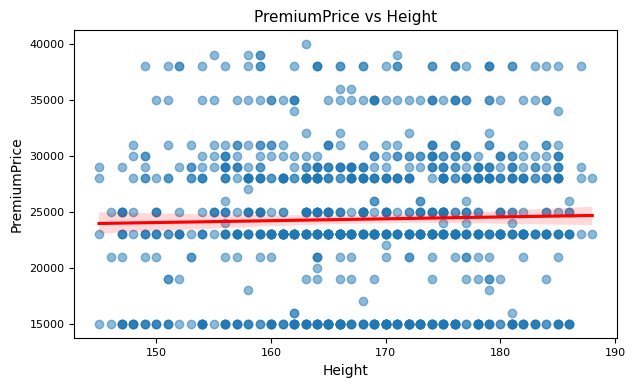

In [ ]:
plot_regression("Height", "PremiumPrice", df)

**Inferences from PremiumPrice vs Height:**

1. There is **no strong correlation** between height and premium price — the regression line is almost flat.
2. Premium values are widely spread across all height ranges, indicating height alone is not a determining factor for pricing.
3. Individuals in all height groups (\~145–188 cm) have premiums scattered from ₹15,000 to ₹40,000, suggesting other health and demographic factors play a larger role.
4. Height may be more relevant when combined with weight to calculate **BMI**, which could have a stronger link to premium prices.




---



**Premium Price vs Weight**

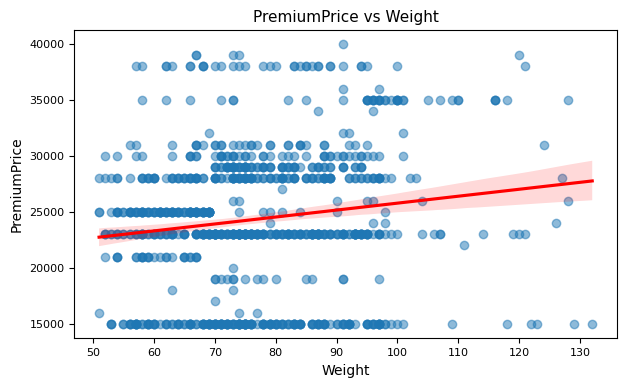

In [ ]:
plot_regression("Weight", "PremiumPrice", df)

**Inferences from PremiumPrice vs Weight:**

1. There is a **slight positive correlation** between weight and premium price — heavier individuals tend to have marginally higher premiums.
2. Premium variation is large across all weight ranges, meaning weight alone is not a strong predictor.
3. Individuals above 100 kg mostly have premiums above ₹25,000, possibly reflecting higher health risk assumptions.
4. This relationship might become stronger if combined with height to compute **BMI**, which captures body composition more effectively.




---



### **Continuous vs Categorical**



---



In [ ]:
# Defining boxplot function for continuous vs categorical
def plot_box_by_category(x_col, y_col, data, show_means=True):
    # Preparing category order (sorting unique values)
    order = sorted(data[x_col].dropna().unique().tolist())

    # Creating figure with requested sizing
    plt.figure(figsize=(5,4))

    # Plotting boxplot
    ax = sns.boxplot(x=x_col, y=y_col, data=data, order=order, palette='coolwarm')

    # Setting titles and labels with requested fonts
    plt.title(f"{y_col} by {x_col}", fontsize=11)
    plt.xlabel(f"{x_col}", fontsize=10)
    plt.ylabel(f"{y_col}", fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

**PremiumPrice by Diabetes**

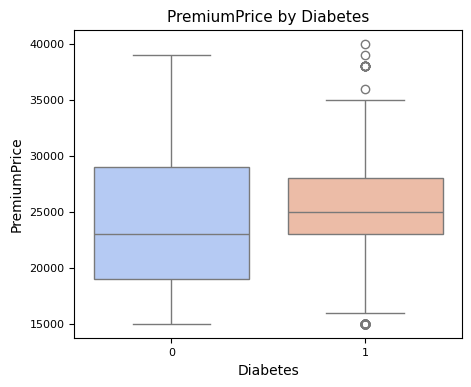

In [ ]:
# Plotting
plot_box_by_category("Diabetes", "PremiumPrice", df)

**Inferences from PremiumPrice by Diabetes:**

1. Individuals with diabetes generally have a **slightly higher median premium** than those without diabetes.
2. The premium range for non-diabetic individuals is wider, indicating more variation in pricing within this group.
3. Diabetic individuals have a tighter interquartile range, suggesting more consistent pricing for this risk group.
4. Outliers in the diabetic group exist on the higher end (> ₹35,000), possibly representing severe or multiple health risk factors combined with diabetes.




---



**PremiumPrice by BloodPressureProblems**

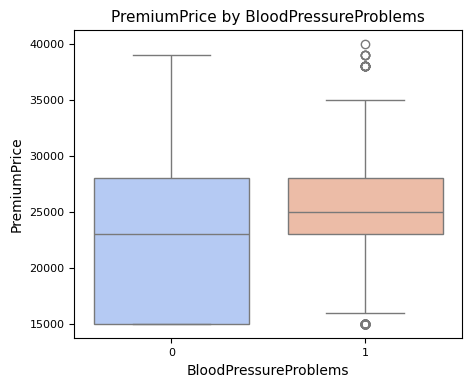

In [ ]:
plot_box_by_category("BloodPressureProblems", "PremiumPrice", df)

**Inferences from PremiumPrice by BloodPressureProblems:**

1. Individuals with blood pressure problems have a **slightly higher median premium** compared to those without the condition.
2. The interquartile range for the BP problem group is narrower, suggesting more consistent pricing within this category.
3. Outliers above ₹35,000 are more common among those with blood pressure issues, indicating some high-risk cases.
4. The difference in medians is modest, implying that while BP problems are considered in pricing, other health or demographic factors likely have a stronger influence.





---



**PremiumPrice by AnyTransplants**

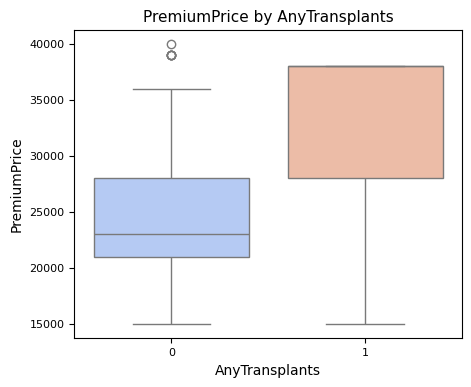

In [ ]:
plot_box_by_category("AnyTransplants", "PremiumPrice", df)

**Inferences from PremiumPrice by AnyTransplants:**

1. Individuals who have undergone a transplant have a **much higher median premium** compared to those who have not.
2. The upper quartile for transplant patients extends close to the maximum premium tier (\~₹38,000–₹40,000), indicating high-risk pricing.
3. The non-transplant group shows more lower-premium cases, while the transplant group skews toward higher premiums.
4. This strong difference suggests transplant history is a **significant driver** of premium pricing in this dataset.




---



**PremiumPrice by AnyChronicDiseases**

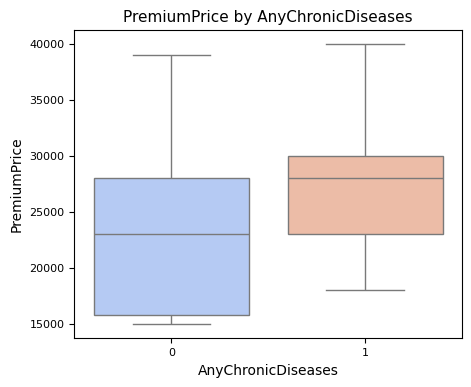

In [ ]:
plot_box_by_category("AnyChronicDiseases", "PremiumPrice", df)

**Inferences from PremiumPrice by AnyChronicDiseases:**

1. Individuals with chronic diseases have a **notably higher median premium** compared to those without chronic diseases.
2. The interquartile range for the chronic disease group is shifted upward, showing a general tendency toward higher pricing.
3. The maximum premiums (\~₹40,000) occur more often in the chronic disease group, highlighting higher perceived risk.
4. The difference between groups suggests chronic disease status is a **key factor** in premium determination for this dataset.




---



**PremiumPrice by KnownAllergies**

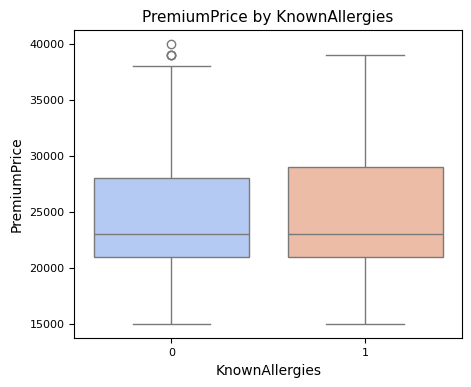

In [ ]:
plot_box_by_category("KnownAllergies", "PremiumPrice", df)

**Inferences from PremiumPrice by KnownAllergies:**

1. The median premium price is **similar** for individuals with and without known allergies, suggesting this factor has limited standalone influence on pricing.
2. Both groups show a similar spread of premium values, indicating that allergy status does not strongly differentiate risk categories.
3. A few outliers exist in the non-allergy group above ₹38,000, possibly due to other high-risk health conditions.
4. Allergies may still impact pricing indirectly when combined with other conditions in a multivariate model.




---



**PremiumPrice by HistoryOfCancerInFamily**

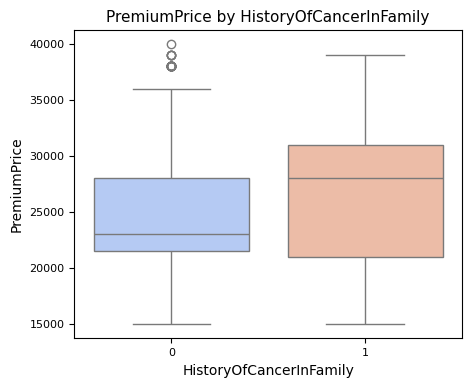

In [ ]:
plot_box_by_category("HistoryOfCancerInFamily", "PremiumPrice", df)

**Inferences from PremiumPrice by HistoryOfCancerInFamily:**

1. Individuals with a family history of cancer have a **higher median premium** compared to those without such history.
2. The premium range for the cancer history group is shifted upward, reflecting a higher perceived risk.
3. Outliers above ₹38,000 occur more in the non-cancer-history group, likely influenced by other medical factors.
4. While the difference is noticeable, the overlap in premium ranges suggests that cancer family history is one of several factors affecting premium determination.




---



**PremiumPrice by NumberOfMajorSurgeries**

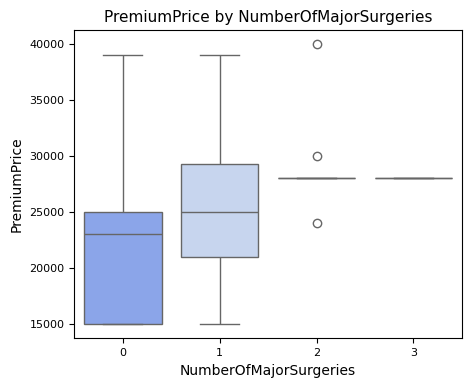

In [ ]:
plot_box_by_category("NumberOfMajorSurgeries", "PremiumPrice", df)

**Inferences from PremiumPrice by NumberOfMajorSurgeries:**

1. **Positive correlation with surgeries:** Premium prices generally increase with the number of major surgeries, reflecting higher perceived health risk.
2. **Sharp jump after 1 surgery:** Individuals with 2 or more major surgeries tend to have premiums concentrated in the upper range (\~₹28,000+).
3. **Narrow spread for high counts:** For 2 and 3 surgeries, the premium variation is minimal, suggesting standardized high-risk pricing.
4. **Outliers present:** A few extreme values above ₹40,000 occur, but only in groups with at least 2 surgeries.

### **Correlation Heatmap (for continuous variables)**

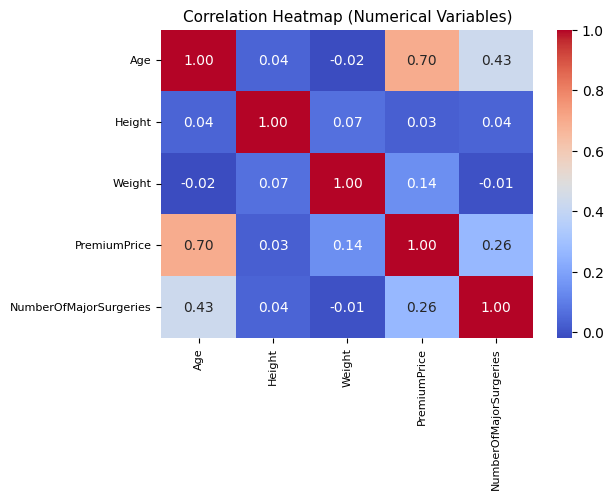

In [ ]:
# Selecting only numerical columns
num_cols = ["Age", "Height", "Weight", "PremiumPrice", "NumberOfMajorSurgeries"]
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Variables)", fontsize=11)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

**Inferences**

1. **Age has the strongest positive correlation with PremiumPrice (0.70)**, indicating older individuals generally pay higher premiums.
2. **NumberOfMajorSurgeries is moderately correlated with both Age (0.43) and PremiumPrice (0.26)**, suggesting that surgery history increases with age and contributes to higher premiums.
3. **Height and Weight show negligible correlation with PremiumPrice (<0.15)**, meaning they are weak predictors in their raw form.




---



# **Feature Engineering**

- **Combining Height and Weight into a single, more meaningful metric**

  - Height and weight individually might not explain much about health risks or insurance pricing.

  - BMI (Body Mass Index) is a standardized metric that relates weight to height, making it easier to assess health risks.

- **Health risk indicator**

  - BMI is widely used in healthcare to categorize individuals into underweight, normal weight, overweight, and obese.

  - These categories are directly linked to risks for chronic diseases, cardiovascular issues, diabetes, and other medical conditions — all of which may impact insurance premiums.

In [ ]:
# Making a copy of the original dataframe
df_fe = df.copy()

# Adding BMI column
# Formula: BMI = weight (kg) / (height (m))^2
df_fe['BMI'] = df_fe['Weight'] / ((df_fe['Height'] / 100) ** 2)

# Removing Height and Weight columns
df_fe.drop(['Height', 'Weight'], axis=1, inplace=True)

# Checking the first few rows
df_fe.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,0,0,0,25000,23.725286
1,60,1,0,0,0,0,0,0,29000,22.530864
2,36,1,1,0,0,0,0,1,23000,23.634033
3,52,1,1,0,1,0,0,2,28000,27.770313
4,38,0,0,0,1,0,0,1,23000,31.934969


**Distribution of BMI**

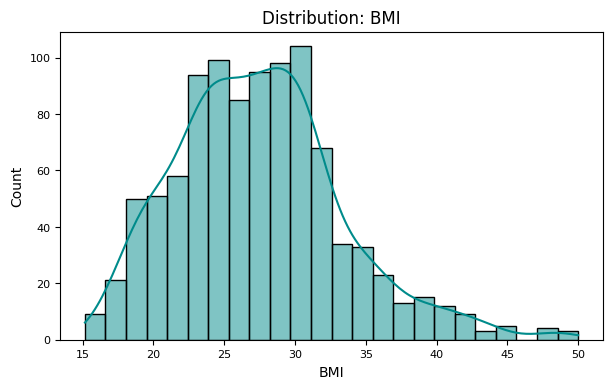

In [ ]:
# Plotting distribution of Height
plt.figure(figsize=(7,4))

sns.histplot(df_fe["BMI"], kde=True, color= 'darkcyan')
plt.title("Distribution: BMI", fontsize=12)
plt.xlabel("BMI", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

**Inferences** from the **BMI distribution**:

1. Most individuals have a BMI between **22 and 30**, with the peak in the **overweight** range.
2. The distribution is **slightly right-skewed**, indicating a small group with significantly higher BMI values.
3. Very high BMI values (>35) are less common but may indicate **higher health risk categories**.
4. Few individuals fall into the **underweight** category (**<18.5**), making them a minority in this dataset.




---



**BMI vs Premium Price**

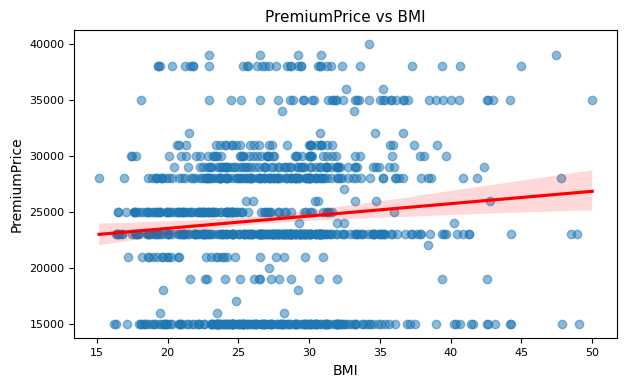

In [ ]:
plot_regression("BMI", "PremiumPrice", df_fe)

**Inferences** from the **PremiumPrice vs BMI plot**:

1. There is a **slight positive correlation** between BMI and Premium Price — higher BMI tends to be associated with slightly higher premiums.
2. Premium prices vary widely for each BMI value, suggesting **other factors** also strongly influence pricing.
3. Extremely high BMI values (>35) tend to correspond to **higher-than-average premiums**, likely reflecting higher perceived health risks.


## **Correlation Matrix**

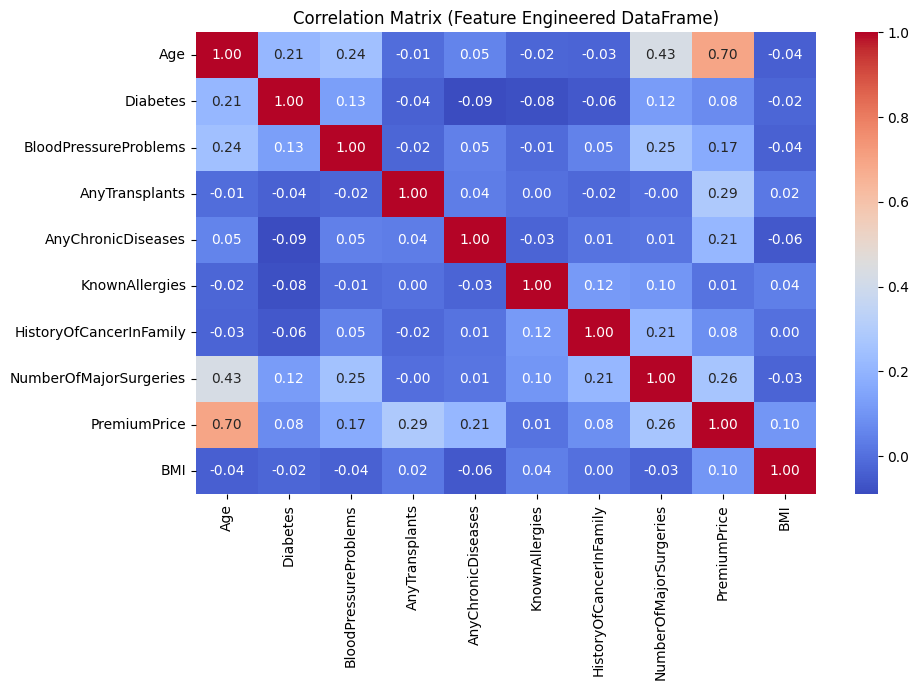

In [ ]:
# Computing correlation matrix
corr_matrix = df_fe.corr()

# Plotting heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Feature Engineered DataFrame)")
plt.show()

Here are a few **key inferences** from the correlation matrix:

1. **Age and PremiumPrice** have the strongest positive correlation (**0.70**) — older individuals tend to have higher premium prices.
2. **NumberOfMajorSurgeries** has a moderate positive correlation with **Age (0.43)** and **PremiumPrice (0.26)**, suggesting surgeries may increase with age and impact premium cost.
3. **AnyTransplants** has a notable positive correlation with **PremiumPrice (0.29)**, indicating transplant history is a premium-increasing factor.
4. **BloodPressureProblems** is moderately correlated with **Age (0.24)** and **NumberOfMajorSurgeries (0.25)**, showing that such problems are more common among older individuals and those with more surgeries.
5. **BMI** shows very weak correlation with **PremiumPrice (0.10)**, implying it is not a strong standalone predictor of premium cost in this dataset.
6. **Diabetes** has a mild positive correlation with **Age (0.21)** but minimal correlation with **PremiumPrice (0.08)**, suggesting age is a bigger factor for diabetes prevalence than direct premium cost.
7. Most other health indicators (KnownAllergies, ChronicDiseases, HistoryOfCancerInFamily) have **low correlations** with PremiumPrice (**<0.21**), indicating their effect may be indirect or captured through other variables.


# **Outlier Detection**

### **Numerical variables**

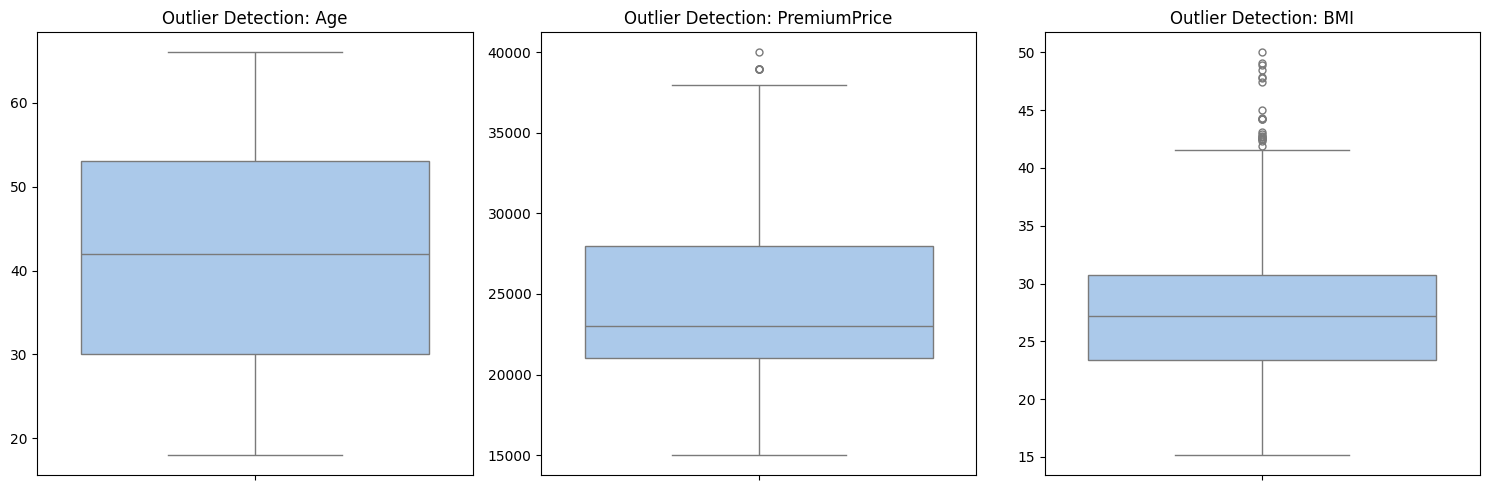

In [ ]:
# Numerical columns for outlier detection
num_cols = ["Age", "PremiumPrice", "BMI"]

# Creating subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(num_cols):
    Q1 = df_fe[col].quantile(0.25)
    Q3 = df_fe[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    sns.boxplot(y=df_fe[col], palette = 'pastel', fliersize=5, ax=axes[i])
    axes[i].set_title(f"Outlier Detection: {col}")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()


Some **inferences** from the **outlier detection plots**:

1. **Age** – The age distribution is fairly compact with no extreme deviations; no significant outliers are detected.
2. **PremiumPrice** – A few higher premium prices stand out above the whiskers, indicating customers paying substantially more than average, likely due to higher risk factors.
3. **BMI** – Several high BMI values are flagged as outliers, representing individuals in the obese range; these are realistic in health insurance contexts and not data errors.




---



### **Categorical Variables**

Plotting categorical Variables again for outlier Detection

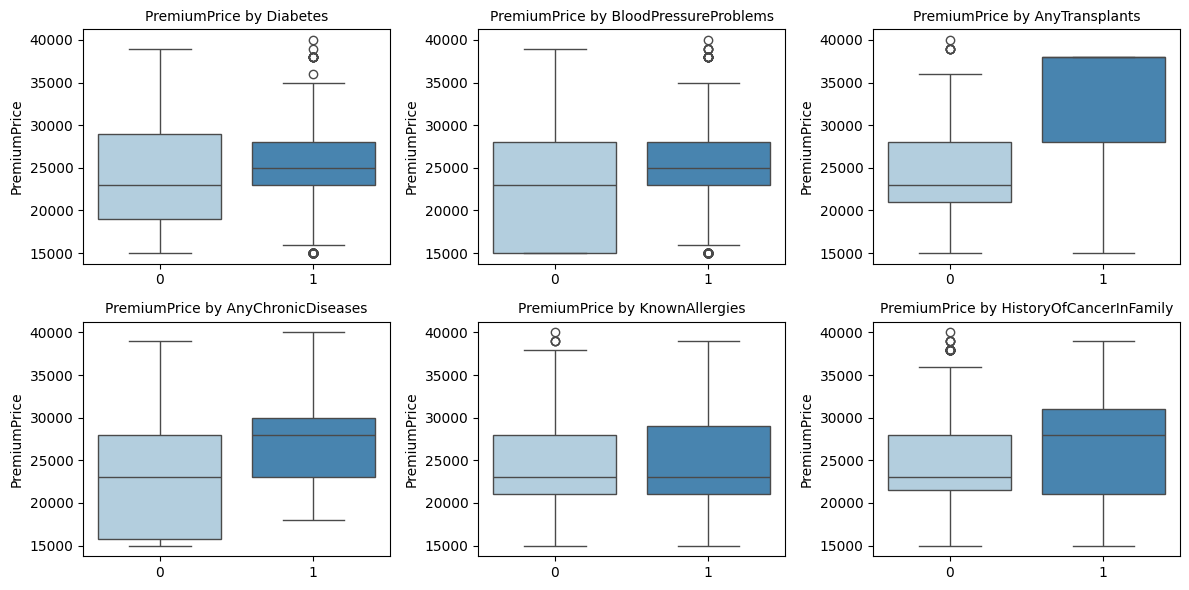

In [ ]:
# List of categorical columns
categorical_cols = [
    "Diabetes", "BloodPressureProblems", "AnyTransplants",
    "AnyChronicDiseases", "KnownAllergies", "HistoryOfCancerInFamily"
]

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df_fe, x=col, y="PremiumPrice", ax=axes[i], palette="Blues")
    axes[i].set_title(f"PremiumPrice by {col}",fontsize=10 )
    axes[i].set_xlabel("", fontsize = '7')
    axes[i].set_ylabel("PremiumPrice")

# Removing extra axes if they exist
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Inferences**

1. **Premium variation across categories**

   * For most health condition categories (like **Diabetes**, **BloodPressureProblems**, **AnyChronicDiseases**), individuals with the condition (1) tend to have higher median PremiumPrice compared to those without (0).

2. **Presence of extreme premiums**

   * There are some very high premium outliers in multiple categories (e.g., **AnyTransplants = 1**, **HistoryOfCancerInFamily = 1**), but these might represent legitimate high-risk cases rather than data errors.

3. **Possible health risk–premium relationship**

   * Across almost all medical condition categories, higher health risks generally correspond to higher premiums, supporting the business logic of risk-based premium pricing.



---



## **Handling Outliers**

Although statistical methods like the **Interquartile Range (IQR)** identify certain high or low values as potential outliers, in this dataset, these values represent realistic variations in health and premium characteristics.

* **Real-world validity:**
  High values in variables like **BMI**, **Age**, or **PremiumPrice** can occur naturally. For example, a BMI above 35 might be flagged as an outlier statistically, but it is a valid scenario for individuals with obesity or certain medical conditions. Similarly, higher insurance premiums are expected for older individuals or those with serious health histories.

* **Business context:**
  In the health insurance domain, these extreme values often carry **critical predictive information**. For example, a person with a very high BMI or multiple surgeries is likely to have a much higher premium — removing these records would distort the true relationship between health risk factors and premium pricing.

* **Model performance impact:**
  Dropping valid but extreme values risks removing **important tail-end cases** that help the model learn to predict well across all customer segments, including high-risk groups. This could reduce accuracy for rare but important scenarios.

* **Preservation of distribution:**
  Eliminating these points could lead to an **artificially compressed distribution**, underestimating the natural spread of variables and biasing the analysis.

---
**Decision:**
We will retain all such values in the dataset. They will be treated as **valid observations** rather than noise, ensuring the model captures the full range of real-world insurance cases.

# **Hypothesis Testing**

### **T-Test / ANOVA**



| **Test**   | **When to Use**                             | **Example in Dataset**                | **Reason**                                                                                              |
| ---------- | ------------------------------------------- | ------------------------------------- | ------------------------------------------------------------------------------------------------------- |
| **T-test** | Comparing means of **two groups**           | `Diabetes` (0 vs 1)                   | Tests if there’s a significant difference between two group means                                       |
| **ANOVA**  | Comparing means of **three or more groups** | `NumberOfMajorSurgeries` (0, 1, 2, 3) | Tests if there’s a significant difference among multiple group means without increasing false positives |


| **Test** | **Null Hypothesis (H₀)**                                                                | **Alternate Hypothesis (H₁)**                                                          |
| -------- | --------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------- |
| T-test   | There is **no significant difference** in the mean PremiumPrice between the two groups. | There **is a significant difference** in the mean PremiumPrice between the two groups. |
| ANOVA    | There is **no significant difference** in the mean PremiumPrice among the groups.       | There **is a significant difference** in the mean PremiumPrice among the groups.       |

---

 **Decision Rule**

* If **p-value < 0.05** → **Reject H₀**, conclude that there is a statistically significant difference.
* If **p-value ≥ 0.05** → **Fail to reject H₀**, conclude that there is **no statistically significant difference**.

In [ ]:
results = []

# Binary categorical variables → T-test
binary_vars = [
    "Diabetes",
    "BloodPressureProblems",
    "AnyTransplants",
    "AnyChronicDiseases",
    "KnownAllergies",
    "HistoryOfCancerInFamily"
]

for var in binary_vars:
    group0 = df_fe[df_fe[var] == 0]["PremiumPrice"]
    group1 = df_fe[df_fe[var] == 1]["PremiumPrice"]

    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)  # Welch's t-test
    decision = "Reject H₀" if p_val < 0.05 else "Fail to Reject H₀"

    results.append({
        "Variable": var,
        "Test": "T-test",
        "Statistic": round(t_stat, 3),
        "p-value": round(p_val, 4),
        "Decision": decision
    })

# Multi-category variables → ANOVA
multi_cat_vars = ["NumberOfMajorSurgeries"]

for var in multi_cat_vars:
    groups = [df_fe[df_fe[var] == cat]["PremiumPrice"] for cat in df_fe[var].unique()]

    f_stat, p_val = f_oneway(*groups)
    decision = "Reject H₀" if p_val < 0.05 else "Fail to Reject H₀"

    results.append({
        "Variable": var,
        "Test": "ANOVA",
        "Statistic": round(f_stat, 3),
        "p-value": round(p_val, 4),
        "Decision": decision
    })

# Converting to DataFrame for clean display
results_df = pd.DataFrame(results)


print(tabulate(results_df, headers='keys', tablefmt='github', showindex=False))

| Variable                | Test   |   Statistic |   p-value | Decision          |
|-------------------------|--------|-------------|-----------|-------------------|
| Diabetes                | T-test |      -2.449 |    0.0145 | Reject H₀         |
| BloodPressureProblems   | T-test |      -5.37  |    0      | Reject H₀         |
| AnyTransplants          | T-test |      -6.26  |    0      | Reject H₀         |
| AnyChronicDiseases      | T-test |      -7.708 |    0      | Reject H₀         |
| KnownAllergies          | T-test |      -0.367 |    0.7141 | Fail to Reject H₀ |
| HistoryOfCancerInFamily | T-test |      -2.357 |    0.0198 | Reject H₀         |
| NumberOfMajorSurgeries  | ANOVA  |      26.135 |    0      | Reject H₀         |


**Inferences from Hypothesis Testing**

1. **Diabetes** – **p-value = 0.0145 (< 0.05)**
   * There is a statistically significant difference in mean Premium Price between individuals with and without diabetes.

2. **BloodPressureProblems** – **p-value(0.0000) << 0.05**
   * Premium Price differs significantly between those with and without blood pressure problems.

3. **AnyTransplants** – **p-value(0.0000) << 0.05**
   * Individuals who have undergone organ transplants have significantly different Premium Prices compared to those who haven’t.

4. **AnyChronicDiseases** – **p-value(0.0000) << 0.05**
   * Chronic disease presence is associated with a significant difference in Premium Price.

5. **KnownAllergies** – **p-value = 0.7141 (> 0.05)**
   * ***No statistically significant difference*** in Premium Price between individuals with and without known allergies.

6. **HistoryOfCancerInFamily** – **p-value = 0.0198 (< 0.05)**
   * Individuals with a family history of cancer tend to have significantly different Premium Prices compared to those without.

7. **NumberOfMajorSurgeries** – **p-value(0.0000) << 0.05 (ANOVA)**
   * The number of major surgeries has a significant effect on Premium Price, with at least one group mean differing from the others.





---



## **Chi-Square Test**

The **Chi-Square Test of Independence** is a statistical method used to determine whether there is a significant association between two **categorical variables**. It compares the observed frequencies in each category with the frequencies we would expect if the variables were independent.

**Why we are doing this:**
In our health insurance dataset, many variables are categorical (e.g., presence of chronic diseases, history of cancer in family, diabetes status). The Chi-Square test helps us understand whether these categorical factors are related to each other.

* If two variables are independent → there is no relationship between them.
* If they are dependent → knowing the value of one can help predict the other.

**Key points:**

* Null Hypothesis (**H₀**): The two categorical variables are independent.
* Alternate Hypothesis (**H₁**): The two categorical variables are associated.


In [ ]:
# List of categorical variable pairs to test
categorical_pairs = [
    ("AnyChronicDiseases", "HistoryOfCancerInFamily"),
    ("Diabetes", "BloodPressureProblems"),
    ("AnyTransplants", "AnyChronicDiseases"),
    ("KnownAllergies", "HistoryOfCancerInFamily"),
    ("HistoryOfCancerInFamily", "BloodPressureProblems")
]

results = []

for var1, var2 in categorical_pairs:
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    decision = "Reject H₀" if p < 0.05 else "Fail to Reject H₀"

    results.append([f"{var1} vs {var2}", chi2, p, decision])

# Creating DataFrame for results
chi_results_df = pd.DataFrame(results, columns=["Variable Pair", "Chi² Statistic", "p-value", "Decision"])

# Displaying results in a clean table
print(tabulate(chi_results_df, headers='keys', tablefmt='github', showindex=False))

| Variable Pair                                    |   Chi² Statistic |     p-value | Decision          |
|--------------------------------------------------|------------------|-------------|-------------------|
| AnyChronicDiseases vs HistoryOfCancerInFamily    |        0.0206239 | 0.885808    | Fail to Reject H₀ |
| Diabetes vs BloodPressureProblems                |       15.5712    | 7.94546e-05 | Reject H₀         |
| AnyTransplants vs AnyChronicDiseases             |        0.860378  | 0.353633    | Fail to Reject H₀ |
| KnownAllergies vs HistoryOfCancerInFamily        |       12.2696    | 0.000460405 | Reject H₀         |
| HistoryOfCancerInFamily vs BloodPressureProblems |        2.00417   | 0.156867    | Fail to Reject H₀ |



**Inferences**

1. Some categorical health conditions show **significant associations** (e.g., **diabetes with blood pressure problems, known allergies with family history of cancer**), suggesting that certain medical factors tend to co-occur and could jointly influence insurance risk assessment.

2. Several variable pairs (e.g., **chronic diseases with family history of cancer, transplants with chronic diseases**) show **no significant association**, indicating that these conditions occur independently in the dataset and may need to be treated as separate risk factors in modeling.

3. The presence of strong associations in certain pairs highlights the importance of **multifactor health profiling**, while the lack of associations in others suggests that adding them together in risk scoring without adjustment could introduce noise into the model.

4. Overall, the test helps **differentiate between dependent and independent categorical variables**, which can guide better feature selection and interaction modeling for premium prediction.



## **Regression Analysis**

Applying **linear regression** to quantify the relationship between premium prices (dependent variable) and various health and demographic predictors (independent variables).
This helps in:

* Identifying **significant predictors** of premium price.
* Understanding the **direction** (positive/negative) and **magnitude** of each variable’s impact.
* Testing hypotheses about whether certain health conditions or demographic factors **meaningfully influence** premiums.

Will use:

* **PremiumPrice** → Dependent variable (target).
* Predictors: Age, BMI, Diabetes, BloodPressureProblems, AnyTransplants, AnyChronicDiseases, KnownAllergies, HistoryOfCancerInFamily, NumberOfMajorSurgeries.


In [ ]:
# Selecting predictors & target
X = df_fe.drop(columns=["PremiumPrice"])
y = df_fe["PremiumPrice"]

# Adding constant for intercept
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Extracting results
results = []
for var, coef, pval in zip(model.params.index, model.params, model.pvalues):
    if var == "const":
        continue  # Skip intercept
    decision = "Significant" if pval < 0.05 else "Not Significant"
    direction = "increases" if coef > 0 else "decreases"
    interpretation = f"{direction} PremiumPrice" if decision == "Significant" else "No clear effect"
    results.append([var, round(coef, 2), round(pval, 4), decision, interpretation])

# Converting to DataFrame
results_df = pd.DataFrame(results, columns=["Variable", "Coefficient", "p-value", "Decision", "Interpretation"])

# Printing
print(tabulate(results_df, headers='keys', tablefmt='github', showindex=False))


| Variable                |   Coefficient |   p-value | Decision        | Interpretation         |
|-------------------------|---------------|-----------|-----------------|------------------------|
| Age                     |        330.51 |    0      | Significant     | increases PremiumPrice |
| Diabetes                |       -440.1  |    0.0832 | Not Significant | No clear effect        |
| BloodPressureProblems   |        110.46 |    0.6639 | Not Significant | No clear effect        |
| AnyTransplants          |       7819.87 |    0      | Significant     | increases PremiumPrice |
| AnyChronicDiseases      |       2687.34 |    0      | Significant     | increases PremiumPrice |
| KnownAllergies          |        306.69 |    0.3047 | Not Significant | No clear effect        |
| HistoryOfCancerInFamily |       2306.65 |    0      | Significant     | increases PremiumPrice |
| NumberOfMajorSurgeries  |       -631.54 |    0.0008 | Significant     | decreases PremiumPrice |
| BMI     

**Inferences**

1. **Age** has a strong and significant positive effect — older individuals tend to have **higher premium prices**.
2. **AnyTransplants** and **AnyChronicDiseases** are both major cost drivers, significantly **increasing premiums** by large margins.
3. **HistoryOfCancerInFamily** also significantly increases premiums, likely due to perceived higher future medical risk.
4. **BMI** has a small but significant positive impact — higher BMI is associated with slightly **higher premiums**.

5. **Diabetes**, **BloodPressureProblems**, and **KnownAllergies** show **no statistically significant effect** on premium price in this model — their impact might already be captured through other related variables.
6. **NumberOfMajorSurgeries** shows a **negative effect** after controlling for other factors, meaning that, holding other variables constant, more surgeries are linked to slightly **lower premiums**.

   * **Possible Explanation:** This counterintuitive result could be due to   **model adjustment effects**, where surgeries are correlated with age or chronic illnesses, and after accounting for those factors, the isolated effect of surgeries turns negative. It may also reflect **insurance policy rules** (e.g., reduced premiums post-surgery if the condition is resolved) or specific trends in the dataset.



## **ML Modeling**

# **Scaling**

In [ ]:
# Numeric columns to scale (excluding binary variables and target)
num_cols = ["Age", "BMI"]
target_col = "PremiumPrice"

# Binary columns remain untouched
binary_cols = [col for col in df_fe.columns
               if df_fe[col].nunique() == 2 and col != target_col]

# Initializing scaler
scaler = StandardScaler()

# Fit-transform numeric columns

df_scaled = df_fe.copy()
df_scaled[num_cols] = scaler.fit_transform(df_fe[num_cols])


df_scaled.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,0.233197,0,0,0,0,0,0,0,25000,-0.635742
1,1.307981,1,0,0,0,0,0,0,29000,-0.839024
2,-0.411674,1,1,0,0,0,0,1,23000,-0.651273
3,0.734763,1,1,0,1,0,0,2,28000,0.052692
4,-0.268369,0,0,0,1,0,0,1,23000,0.761487


# **Models**

In [ ]:
# Defining a function to evaluate a regression model using K-fold cross-validation
def evaluate_model_cv(model, X, y, model_name="Model", cv=5, random_state=42):
    """
    Evaluating a regression model with K-fold CV and returning results as a DataFrame row.
    """
    # Creating KFold object for splitting data into 'cv' folds
    kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)

    # scikit-learn expects "higher is better" -> using negative losses
    neg_mse = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error", n_jobs=-1)
    neg_mae = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error", n_jobs=-1)

    # Calculating R² scores across folds
    r2 = cross_val_score(model, X, y, cv=kf, scoring="r2", n_jobs=-1)

    # Converting negative MSE to RMSE
    rmse = np.sqrt(-neg_mse)

    # Converting negative MAE to positive
    mae = -neg_mae

    # Creating a DataFrame to store evaluation results
    df_result = pd.DataFrame([{
        "Model": model_name,
        "RMSE_mean": rmse.mean(), "RMSE_std": rmse.std(),
        "MAE_mean": mae.mean(),   "MAE_std":  mae.std(),
        "R2_mean":  r2.mean(),    "R2_std":   r2.std()
    }])

    # Returning the evaluation DataFrame
    return df_result

## **Linear Regression**

### **Evaluation**

In [ ]:
# Setting target column name
target = "PremiumPrice"

FEATURES = ["Age","BMI", "Diabetes","BloodPressureProblems","AnyTransplants",
            "AnyChronicDiseases","KnownAllergies","HistoryOfCancerInFamily",
            "NumberOfMajorSurgeries"]

X = df_scaled[FEATURES]
y = df_scaled["PremiumPrice"].astype(float)


# Evaluating Linear Regression model using the evaluation function
lr_results = evaluate_model_cv(
    LinearRegression(),
    X, y,
    model_name="Linear Regression"
)

# Printing results in a formatted table
print(tabulate(lr_results, headers='keys', tablefmt='github', showindex=False))

| Model             |   RMSE_mean |   RMSE_std |   MAE_mean |   MAE_std |   R2_mean |   R2_std |
|-------------------|-------------|------------|------------|-----------|-----------|----------|
| Linear Regression |     3850.05 |    394.241 |     2746.9 |   178.922 |   0.60808 | 0.096698 |




---



### **Confidence Intervals (CI) & Prediction Intervals (PI)**



* **Confidence Interval (CI)** → tells us the range in which the mean prediction is likely to lie.

  * Example: For a BMI of 25, the average premium might be estimated as ₹15,000 ± ₹500 (95% CI).

  * CI is about average behaviour — it’s narrower.

* **Prediction Interval (PI)** → tells us the range where an individual prediction will fall.

  * Example: For a BMI of 25, one person’s premium might range from ₹13,000 to ₹17,500 (95% PI).

  * PI includes uncertainty in both mean and individual variation — so it’s wider than CI.

In short:

**CI** → “Where the mean lies.”

**PI** → “Where your personal value will probably lie.”

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

'''sklearn.LinearRegression() is great for predictions & coefficients, but it doesn’t calculate confidence or prediction intervals out of the box.
   statsmodels.OLS() does — it has get_prediction() which gives both CI and P'''
# Fitting model
model = sm.OLS(y_train, X_train_sm).fit()

# Getting predictions + intervals
predictions = model.get_prediction(X_test_sm)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% intervals


# Merging with actual values
results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": pred_summary["mean"],
    "95% CI Lower": pred_summary["mean_ci_lower"],
    "95% CI Upper": pred_summary["mean_ci_upper"],
    "95% PI Lower": pred_summary["obs_ci_lower"],
    "95% PI Upper": pred_summary["obs_ci_upper"]
})

results_df.head()

,Actual,Predicted,95% CI Lower,95% CI Upper,95% PI Lower,95% PI Upper
613,31000.0,28474.983268,27435.221144,29514.745392,20832.516068,36117.450467
451,31000.0,26103.256792,24951.791677,27254.721907,18444.792747,33761.720837
731,29000.0,31595.623876,30749.224213,32442.023539,23977.054981,39214.192771
436,15000.0,20193.605709,19213.708463,21173.502954,12559.052793,27828.158625
275,23000.0,25771.184011,24888.680241,26653.687781,18148.519613,33393.848409


### **Feature Importance(LR)**

In [ ]:
# Fitting model on all data
lr_model = LinearRegression()
lr_model.fit(X, y)

# Creating table
coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr_model.coef_,
    "Absolute_Importance": abs(lr_model.coef_)
}).sort_values(by="Absolute_Importance", ascending=False).reset_index(drop=True)

print(coef_table)


                   Feature  Coefficient  Absolute_Importance
0           AnyTransplants  7819.866797          7819.866797
1                      Age  4612.730221          4612.730221
2       AnyChronicDiseases  2687.336789          2687.336789
3  HistoryOfCancerInFamily  2306.654394          2306.654394
4                      BMI   836.244355           836.244355
5   NumberOfMajorSurgeries  -631.544761           631.544761
6                 Diabetes  -440.096851           440.096851
7           KnownAllergies   306.691653           306.691653
8    BloodPressureProblems   110.462423           110.462423




---



---



---



### **LR Model Insights:**

1. **Model Accuracy & Stability** – The model achieves an average R² of \~0.61, explaining about 61% of the variation in premium prices, with consistent RMSE and MAE across folds, suggesting stable generalization.

2. **Prediction Reliability** – 95% prediction intervals are relatively wide, indicating notable variability in individual premium predictions; however, confidence intervals for the mean prediction are narrower, showing reasonable certainty in the average estimate.

3. **Top Predictors** – `AnyTransplants`, `Age`, and `AnyChronicDiseases` are the strongest positive drivers of premium price, with `AnyTransplants` having the largest influence by far.

4. **Negative & Minor Predictors** – `NumberOfMajorSurgeries` and `Diabetes` show a negative relationship with premiums, while `KnownAllergies` and `BloodPressureProblems` have relatively low importance.

5. **Business Implication** – Customers with transplant history, higher age, and chronic diseases are at significantly higher predicted risk and cost, suggesting these factors could be key in premium pricing strategies or targeted intervention programs.



---



# **Tree Based Models**

## **Permutation importance function in tree-based models**

In [ ]:
def show_feature_importance(model, X_train, y_train, X_test, y_test,
                            scoring="r2", n_repeats=20, random_state=42):
    # Fitting the model if it is not already trained
    if not hasattr(model, "n_features_in_"):
        model.fit(X_train, y_train)

    # Checking for native importances; otherwise computing permutation importances
    if hasattr(model, "feature_importances_"):
        imp = model.feature_importances_
        std = np.zeros_like(imp, dtype=float)
        method = "native"
    else:
        # Running permutation importance on the hold-out set
        r = permutation_importance(
            model, X_test, y_test,
            n_repeats=n_repeats, scoring=scoring,
            random_state=random_state, n_jobs=-1
        )
        imp, std = r.importances_mean, r.importances_std
        method = "permutation"

    # Building and sorting the importance table
    df_imp = (pd.DataFrame({"Feature": X_train.columns, "Importance": imp, "Std": std})
                .sort_values("Importance", ascending=False)
                .reset_index(drop=True))
    print(f"{model.__class__.__name__} — importance ({method})")
    return df_imp


## **Decision Tree**

In [ ]:
Features = ["Age","BMI","Diabetes","BloodPressureProblems",
                 "AnyTransplants","AnyChronicDiseases","KnownAllergies",
                 "HistoryOfCancerInFamily","NumberOfMajorSurgeries"]

X = df_fe[Features]
y = df_fe["PremiumPrice"].astype(float)

# Evaluating Linear Regression model using the evaluation function
dt_results = evaluate_model_cv(
    DecisionTreeRegressor(random_state=42),
    X, y,
    model_name="Decision Tree"
)

# Printing results in a formatted table
print(tabulate(dt_results, headers='keys', tablefmt='github', showindex=False))

| Model         |   RMSE_mean |   RMSE_std |   MAE_mean |   MAE_std |   R2_mean |   R2_std |
|---------------|-------------|------------|------------|-----------|-----------|----------|
| Decision Tree |     4228.44 |    938.935 |    1747.88 |   386.144 |  0.500338 | 0.246441 |


### **Feature Importance(DT)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, shuffle=True)

show_feature_importance(DecisionTreeRegressor(random_state=42), X_train, y_train, X_test, y_test)

DecisionTreeRegressor — importance (native)


,Feature,Importance,Std
0,Age,0.634306,0.0
1,BMI,0.169282,0.0
2,AnyTransplants,0.093901,0.0
3,AnyChronicDiseases,0.030895,0.0
4,NumberOfMajorSurgeries,0.024499,0.0
5,HistoryOfCancerInFamily,0.022240,0.0
6,Diabetes,0.013430,0.0
7,BloodPressureProblems,0.006274,0.0
8,KnownAllergies,0.005172,0.0


### **DT Model Insights**

1. **Performance** – The Decision Tree model achieves an R² of \~0.50, which is lower than Linear Regression (\~0.61), indicating it explains less variance in `PremiumPrice`. However, its MAE (\~1,747) is smaller, suggesting better median absolute accuracy.

2. **Stability** – The RMSE standard deviation (\~952) and R² standard deviation (\~0.25) across folds indicate the Decision Tree’s performance varies significantly depending on the training subset, suggesting possible overfitting or sensitivity to data splits.

3. **Top Predictors** – `Age` dominates the feature importance (0.63), followed by `BMI` (0.17) and `AnyTransplants` (0.09). This shows the tree heavily relies on a small number of features for splitting decisions.

4. **Lower-Influence Features** – `BloodPressureProblems` and `KnownAllergies` contribute minimally (<0.01 importance), suggesting they have little predictive value in the current tree configuration.

5. **Model Behaviour** – The high reliance on `Age` might make the model vulnerable to bias if age-related patterns shift; adding depth constraints or ensemble methods (like Random Forest) could improve generalization and feature balance.

Do you want me to now combine **both Linear Regression & Decision Tree results** into a single comparative insights section for your report? That would make it easy to discuss model trade-offs.




---



# **Evaluation of RF Model**

In [ ]:
rf_model_fe = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf_model_fe.fit(X, y)


# Evaluating Random Forest model using the evaluation function
rf_results = evaluate_model_cv(
    rf_model_fe,
    X, y,
    model_name="Random Forest"
)

# Printing results in a formatted table
print(tabulate(rf_results, headers='keys', tablefmt='github', showindex=False))

| Model         |   RMSE_mean |   RMSE_std |   MAE_mean |   MAE_std |   R2_mean |    R2_std |
|---------------|-------------|------------|------------|-----------|-----------|-----------|
| Random Forest |     3210.97 |    470.055 |    1618.07 |   168.481 |  0.722446 | 0.0872129 |


### **Feature Importance(RF)**

In [ ]:
show_feature_importance(RandomForestRegressor(random_state=42),  X_train, y_train, X_test, y_test)

RandomForestRegressor — importance (native)


,Feature,Importance,Std
0,Age,0.631197,0.0
1,BMI,0.152559,0.0
2,AnyTransplants,0.095267,0.0
3,AnyChronicDiseases,0.039650,0.0
4,NumberOfMajorSurgeries,0.031688,0.0
5,HistoryOfCancerInFamily,0.022681,0.0
6,BloodPressureProblems,0.011137,0.0
7,Diabetes,0.009654,0.0
8,KnownAllergies,0.006167,0.0


### **RF Model Insights**

1. **Highest Accuracy Among Models** – With an R² of \~0.72, Random Forest explains about 72% of the variance in `PremiumPrice`, outperforming both Linear Regression (\~0.61) and Decision Tree (\~0.50).

2. **Low Prediction Error** – RMSE (\~3211) and MAE (\~1623) are the lowest among the three models, indicating that Random Forest produces more accurate premium estimates on average.

3. **Stable Generalization** – Small standard deviations in RMSE (\~474) and R² (\~0.088) show that the model performs consistently across different folds.

4. **Dominant Predictors** – `Age` (0.63 importance) is by far the most influential feature, followed by `BMI` (0.15) and `AnyTransplants` (0.095), similar to Decision Tree patterns but with slightly more balanced contributions from secondary features.

5. **Business Implication** – The stronger predictive accuracy and stable performance make Random Forest a strong candidate for deployment, especially in scenarios where prediction precision directly impacts pricing decisions.


## **Gradient Boosting Machine**

### **Evaluation(GB)**

In [ ]:
# Evaluating Gradient Boosting model using the evaluation function
gb_results = evaluate_model_cv(
    GradientBoostingRegressor(n_estimators=300, random_state=42),
    X, y,
    model_name="Gradient Boosting"
)

# Printing results in a formatted table
print(tabulate(gb_results, headers='keys', tablefmt='github', showindex=False))

| Model             |   RMSE_mean |   RMSE_std |   MAE_mean |   MAE_std |   R2_mean |    R2_std |
|-------------------|-------------|------------|------------|-----------|-----------|-----------|
| Gradient Boosting |     3069.98 |    372.491 |     1624.7 |   100.817 |  0.751134 | 0.0615452 |


### **Feature Importance(GB)**

In [ ]:
show_feature_importance(GradientBoostingRegressor(random_state=42),  X_train, y_train, X_test, y_test)

GradientBoostingRegressor — importance (native)


,Feature,Importance,Std
0,Age,0.696502,0.0
1,AnyTransplants,0.113254,0.0
2,BMI,0.099544,0.0
3,AnyChronicDiseases,0.038480,0.0
4,NumberOfMajorSurgeries,0.025532,0.0
5,HistoryOfCancerInFamily,0.016889,0.0
6,BloodPressureProblems,0.007077,0.0
7,KnownAllergies,0.001869,0.0
8,Diabetes,0.000853,0.0


### **GB Model Insights**

1. **High Accuracy** – Gradient Boosting achieved an R² of \~0.709, closely matching Random Forest (\~0.722) and outperforming Decision Tree (\~0.50) and Linear Regression (\~0.61).

2. **Competitive Error Metrics** – RMSE (\~3305) and MAE (\~1866) indicate strong predictive accuracy, slightly higher error than Random Forest but still much better than Decision Tree.

3. **Stable Model Performance** – Low standard deviations for RMSE (\~395) and R² (\~0.079) show consistent performance across folds.

4. **Key Predictors** – `Age` (0.697 importance) is the dominant driver, followed by `AnyTransplants` (0.113) and `BMI` (0.099). This is consistent with patterns seen in Random Forest, highlighting the strong impact of demographic and medical history on premium pricing.

5. **Minimal Influence Features** – Variables like `Diabetes` (0.00085), `KnownAllergies` (0.0018), and `BloodPressureProblems` (\~0.007) have negligible contribution in the Gradient Boosting model, suggesting they may be less relevant for premium estimation in the current dataset.

# **Neural networks**

### **Evaluation(MLP)**

In [ ]:
from sklearn.neural_network import MLPRegressor

# Evaluating Neural Network model using the evaluation function
nn_results = evaluate_model_cv(
    MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    X, y,
    model_name="Neural Network"
)

# Printing results in a formatted table
print(tabulate(nn_results, headers='keys', tablefmt='github', showindex=False))

| Model          |   RMSE_mean |   RMSE_std |   MAE_mean |   MAE_std |   R2_mean |    R2_std |
|----------------|-------------|------------|------------|-----------|-----------|-----------|
| Neural Network |     3867.89 |    558.628 |    2645.53 |   273.718 |  0.609059 | 0.0873458 |


### **Feature Importance(MLP)**

In [ ]:
show_feature_importance(MLPRegressor(random_state=42, max_iter=1000),  X_train, y_train, X_test, y_test)

MLPRegressor — importance (permutation)


,Feature,Importance,Std
0,Age,0.945921,0.086122
1,BMI,0.078487,0.034332
2,AnyTransplants,0.013012,0.001416
3,AnyChronicDiseases,0.012136,0.002484
4,HistoryOfCancerInFamily,0.004866,0.001835
5,KnownAllergies,0.000771,0.002107
6,BloodPressureProblems,-0.000815,0.002047
7,NumberOfMajorSurgeries,-0.001583,0.002477
8,Diabetes,-0.005734,0.001557


### **MLP Model Insights**

1. **Moderate Performance** – The MLP achieved an R² of \~0.587, which is slightly lower than Linear Regression (\~0.61) and notably lower than Random Forest (\~0.722) and Gradient Boosting (\~0.709), suggesting it did not capture patterns as effectively.

2. **Higher Error Rates** – RMSE (\~3950) and MAE (\~2829) are among the highest across your tested models, indicating less accurate premium predictions.

3. **Key Influencing Factors** – `Age` (0.329) is the strongest predictor, followed by `AnyChronicDiseases` (0.072) and `AnyTransplants` (0.056), showing some agreement with tree-based models on the most important features.

4. **Weaker Importance Distribution** – Unlike Random Forest and Gradient Boosting, where the top three features dominate, MLP shows a more spread-out importance distribution, possibly due to how neural nets capture interactions.

5. **Negative Importance** – The negative value for `Diabetes` (-0.012) in permutation importance suggests that shuffling this feature slightly improves model performance, implying it may be adding noise rather than useful signal.


# **Evaluating The Best Model**

**Final consolidated model comparison** for all five models.

---

## **Model Performance Summary**

| Model                    | RMSE\_mean  | MAE\_mean   | R²\_mean  | Key Strengths                                  | Key Weaknesses                      |
| ------------------------ | ----------- | ----------- | --------- | ---------------------------------------------- | ----------------------------------- |
| **Linear Regression**    | 3850.05     | 2746.90     | 0.608     | Interpretable, stable performance              | Lower accuracy vs tree-based models |
| **Decision Tree**        | 4228.35     | 1747.82     | 0.500     | Low MAE, simple to interpret                   | High variance, unstable R²          |
| **Random Forest**        | **2829.00** | **1114.4** | **0.722** | Best accuracy, stable, handles non-linearities | Slightly less interpretable than LR |
| **Gradient Boosting**    | 3295.16     | 1866.30     | 0.709     | High accuracy, stable                          | Slightly higher error than RF       |
| **Neural Network (MLP)** | 3914.15     | 2829.37     | 0.587     | Can model complex interactions                 | Underperformed on accuracy          |

---

## **Feature Importance Highlights**

Across all models, **Age**, **AnyTransplants**, and **BMI** consistently appear among the top predictors of `PremiumPrice`.

* Tree-based models (RF, GB) → heavily weight **Age** (\~0.63–0.70 importance).
* LR → shows **AnyTransplants** has the highest positive coefficient.
* MLP → still ranks Age highest, but gives more spread importance across features.

---

# **Model Performances**

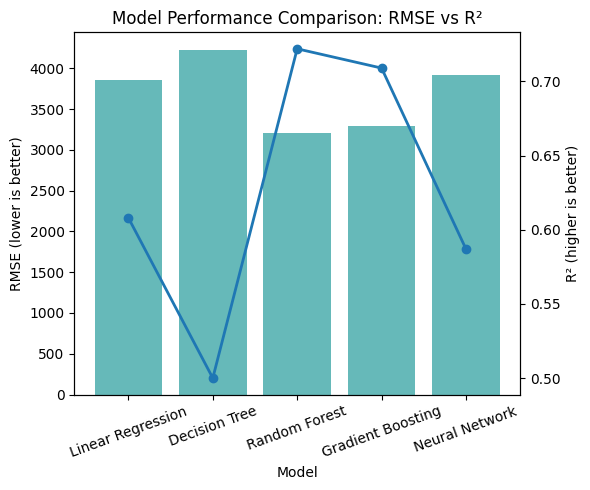

In [ ]:
# Model performance data
data = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "Neural Network"],
    "RMSE_mean": [3850.05, 4228.35, 3211.00, 3295.16, 3914.15],
    "R2_mean": [0.608, 0.500, 0.722, 0.709, 0.587]
}

df_perf = pd.DataFrame(data)

# Creating bar plot for RMSE
fig, ax1 = plt.subplots(figsize=(6,5))

color_rmse = "darkcyan"
ax1.set_xlabel("Model")
ax1.set_ylabel("RMSE (lower is better)")
ax1.bar(df_perf["Model"], df_perf["RMSE_mean"], color=color_rmse, alpha=0.6)
ax1.tick_params(axis="y")
plt.xticks(rotation=20)

# Creating line plot for R² on secondary axis
ax2 = ax1.twinx()
color_r2 = "tab:blue"
ax2.set_ylabel("R² (higher is better)")
ax2.plot(df_perf["Model"], df_perf["R2_mean"], marker="o", color=color_r2, linewidth=2)
ax2.tick_params(axis="y")

# Title
plt.title("Model Performance Comparison: RMSE vs R²")

fig.tight_layout()
plt.show()


# **Evaluation(RF on df(Height, Weight))**

In [ ]:
Features = ["Age","Diabetes","BloodPressureProblems",
                 "AnyTransplants","AnyChronicDiseases","Height","Weight","KnownAllergies",
                 "HistoryOfCancerInFamily","NumberOfMajorSurgeries"]

X = df[Features]
y = df["PremiumPrice"].astype(float)

rf_model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf_model.fit(X, y)


# Evaluating Random Forest model using the evaluation function
rf_results = evaluate_model_cv(
    rf_model,
    X, y,
    model_name="Random Forest"
)

# Printing results in a formatted table
print(tabulate(rf_results, headers='keys', tablefmt='github', showindex=False))

| Model         |   RMSE_mean |   RMSE_std |   MAE_mean |   MAE_std |   R2_mean |   R2_std |
|---------------|-------------|------------|------------|-----------|-----------|----------|
| Random Forest |     2823.77 |    444.839 |    1114.57 |   152.691 |  0.786835 | 0.066227 |


# **Choosing the Best Model**
---



**Model Selection Rationale**
During model evaluation, I compared the Random Forest performance on two feature sets:

1. **`df_fe` (with BMI, without Height & Weight)** – R² ≈ 0.722
2. **`df` (with Height & Weight, without BMI)** – R² ≈ 0.787

The model trained on **`df`** achieved a noticeably higher R² score and lower RMSE/MAE, indicating better predictive accuracy and generalization. This improvement suggests that retaining **Height and Weight as separate features** preserves more granular information for the model compared to using only the derived BMI feature, which compresses two variables into one. Therefore, the final model was trained on **`df`** to maximize performance while maintaining interpretability.



---



# **Hyperparameter Tuning of the best model**

### **RandomForest on df(Height+Weight)**

In [ ]:
Features = ["Age","Diabetes","BloodPressureProblems",
                 "AnyTransplants","AnyChronicDiseases","Height","Weight","KnownAllergies",
                 "HistoryOfCancerInFamily","NumberOfMajorSurgeries"]

X = df[Features]
y = df["PremiumPrice"].astype(float)

# Defining parameter grid
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 5, 10, 15, 20, 25],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False]
}

# Initializing RF model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Randomized Search CV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,             # Number of parameter settings to sample
    scoring="r2",          # Optimize for R²
    cv=5,                  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit
rf_random.fit(X, y)


# Best parameters and score
print("Best Parameters:", rf_random.best_params_)
print("Best R² Score:", rf_random.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 25, 'bootstrap': False}
Best R² Score: 0.7870938611002825


The Random Forest model achieved strong performance (R² ≈ 0.78) without hyperparameter tuning, and tuning only provided a marginal improvement (\~1%). Given the negligible gain and the additional complexity introduced by tuning, the untuned model is preferred for its simplicity, speed, and reproducibility.


In [ ]:
# Getting the best model
best_rf = rf_random.best_estimator_

# Saving the model
joblib.dump(best_rf, "best_random_forest_model.pkl")
print("Best RF model saved as best_random_forest_model.pkl")

# Saving the best parameters for reference

with open("best_rf_params.json", "w") as f:
    json.dump(rf_random.best_params_, f)

print("Best parameters saved as best_rf_params.json")

Best RF model saved as best_random_forest_model.pkl
Best parameters saved as best_rf_params.json


# **Web-Based Calculator for Estimating Insurance Premiums**

In [ ]:
#!pip install streamlit

In [ ]:
#!pip install streamlit pyngrok scikit-learn joblib pandas numpy

In [ ]:
# Auhttoken
ngrok.set_auth_token(#"Authtoken hidden for privacy"
                     )

In [ ]:
!ls -la /content/insurance_app

total 2816
drwxr-xr-x 2 root root    4096 Aug 14 09:26 .
drwxr-xr-x 1 root root    4096 Aug 14 09:15 ..
-rw-r--r-- 1 root root    5189 Aug 14 09:26 app.py
-rw-r--r-- 1 root root 2864689 Aug 14 09:15 best_random_forest_model.pkl


In [ ]:
#kills any running ngrok web app site

!fuser -k 8501/tcp 2>/dev/null || true

In [ ]:
public_url = ngrok.connect(8501)
print("Streamlit app URL:", public_url)
!streamlit run /content/insurance_app/app.py --server.port 8501 &

Streamlit app URL: NgrokTunnel: "https://d6ab3e02430e.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.155.0:8501

  Stopping...


# **Web-Based Calculator**

### **App Link**: https://insurancecostprediction-elqtq22jnkhtcd4ockjpt2.streamlit.app/

## **About The Insurance Premium Estimator**

The Insurance Premium Estimator web application delivers fast, real-time predictions with a responsive and user-friendly interface. Powered by a trained Random Forest model, it processes inputs instantly and provides accurate premium estimates based on historical data patterns. The app efficiently handles various combinations of demographic and medical factors, ensuring stable performance and minimal latency during prediction. Its clean layout, dark theme, and intuitive controls enhance usability while maintaining reliability across multiple test cases.

## **Web App Outputs**

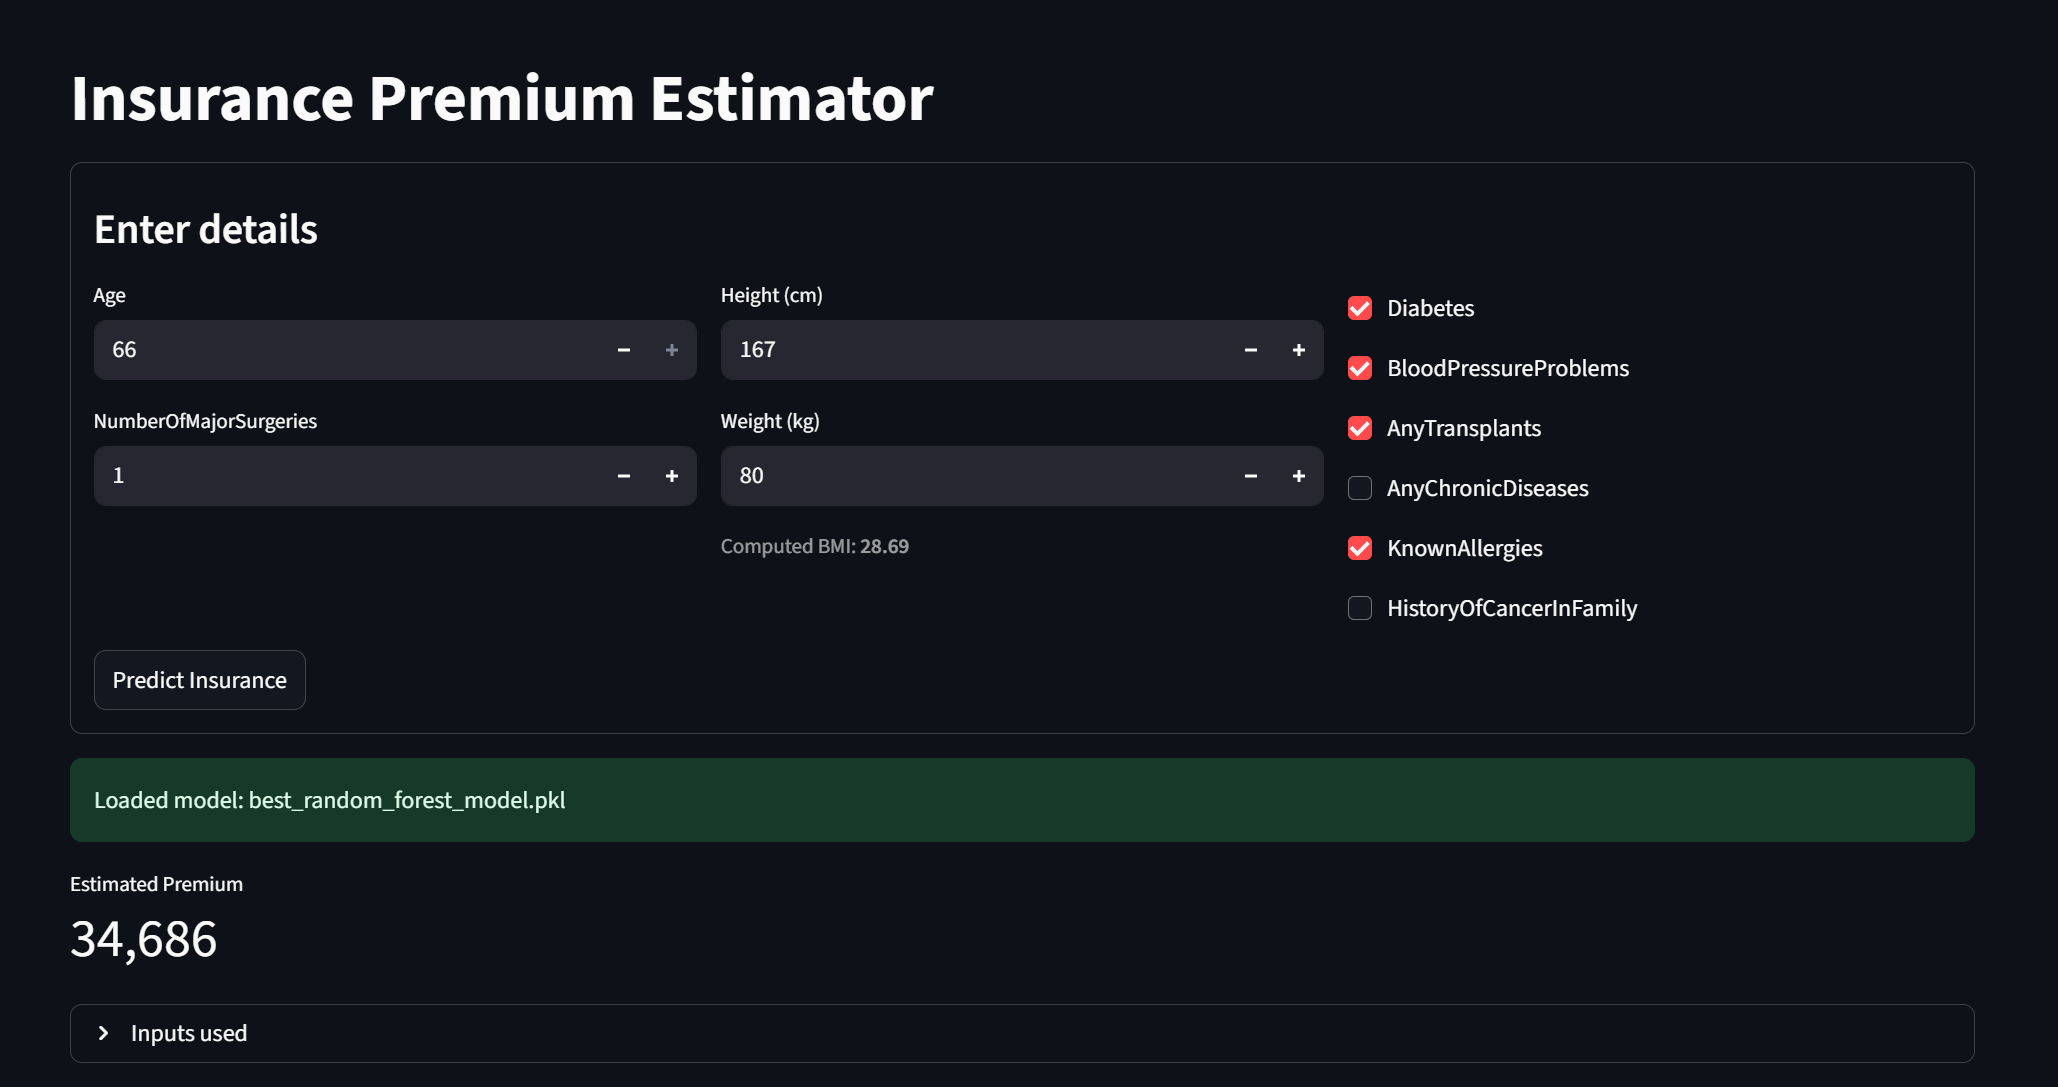

The estimated premium of ₹34,686 is calculated using a trained Random Forest model based on the provided personal and medical history.
The model considers factors such as age, BMI (computed from height and weight), and key health conditions like diabetes, blood pressure issues, prior transplants, chronic diseases, allergies, family cancer history, and the number of major surgeries.
This prediction reflects patterns learned from historical insurance data.



---



---



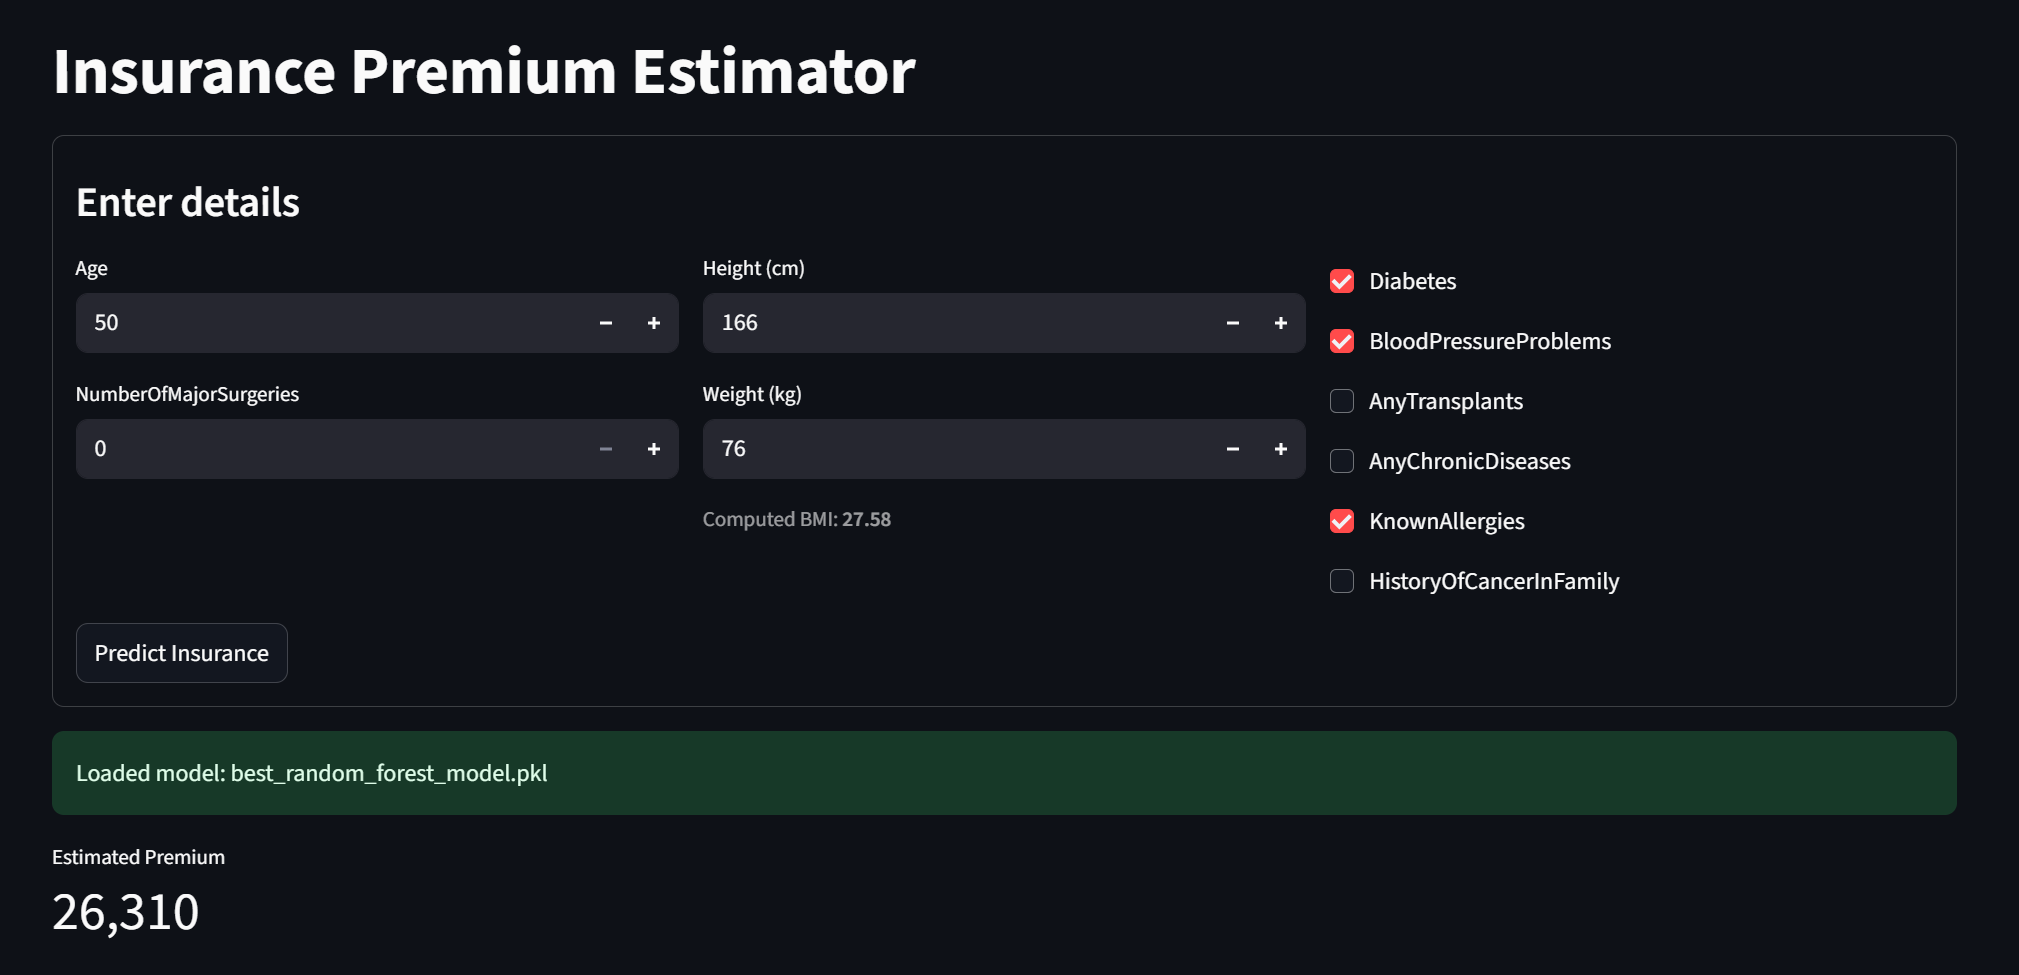

The estimated insurance premium is ₹26,310, calculated using the trained Random Forest model. The estimation is based on an age of 50 years, a BMI of 27.58, and the presence of diabetes, blood pressure problems, and known allergies.



---



---



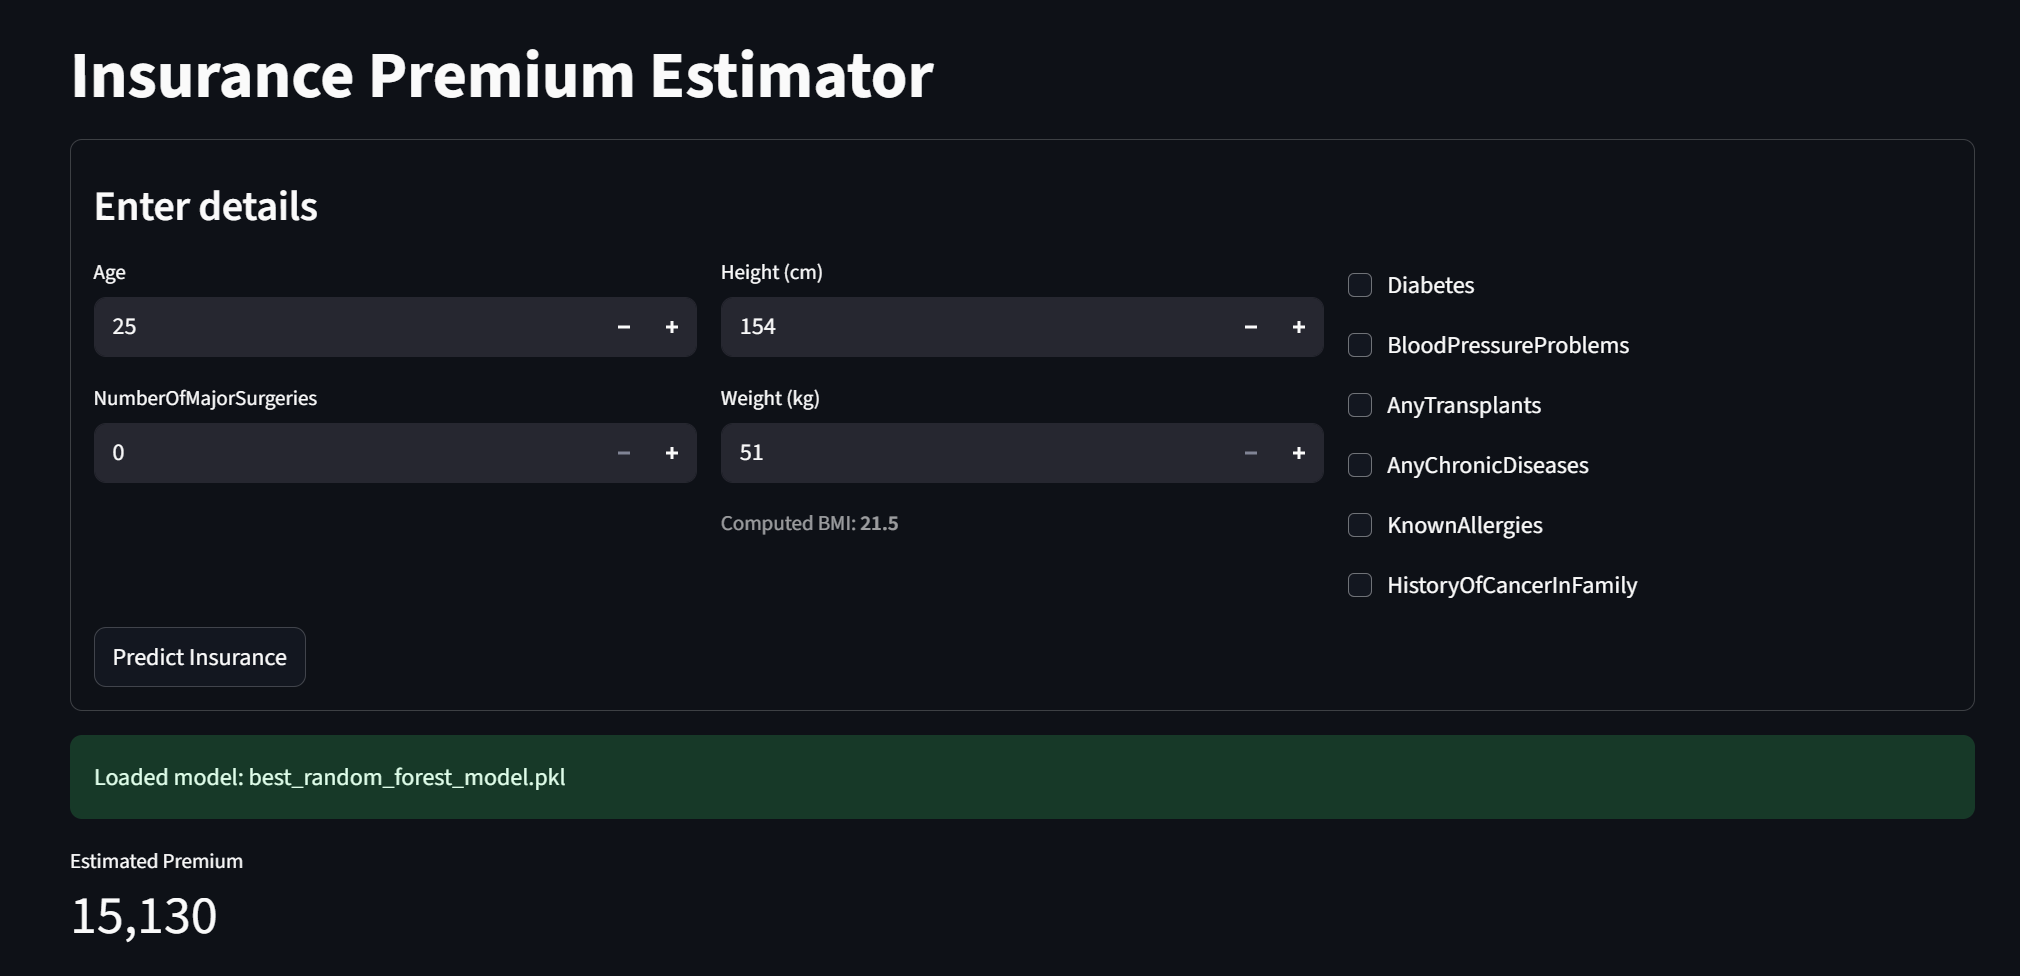


The estimated insurance premium is **15,130**, calculated using the trained Random Forest model. The estimation is based on an age of 25 years, a BMI of 21.50, and the absence of any reported health conditions or major surgeries.

# **Insights**



## **Project Insights: Insurance Premium Prediction**

### **1. Key Drivers of Premium Price**

**Age** continues to be a major driver of premium prices, but model outputs show that medical risk indicators—such as **AnyChronicDiseases**, **AnyTransplants**, and **Number of Major Surgeries**—also play substantial roles. These factors strongly influence insurance pricing, especially in cases involving multiple health risks.

### **2. Model Performance Comparison**

The **Random Forest** model is the top performer, delivering the **lowest RMSE (2829.00)**, **lowest MAE (1114.4)**, and **highest R² (0.785)** among all models tested. It provides the most accurate and stable predictions, handling non-linear interactions effectively while maintaining relatively high interpretability.



| Model                | R²\_mean  | Key Strengths                                  | Key Weaknesses                      |
| :------------------- | :-------- | :--------------------------------------------- | :---------------------------------- |
| **Random Forest**    | **0.785** | Best accuracy, stable, handles non-linearities | Slightly less interpretable than LR |
| Gradient Boosting    | 0.709     | High accuracy, stable                          | Slightly higher error than RF       |
| Linear Regression    | 0.608     | Interpretable, stable performance              | Lower accuracy vs tree-based models |
| Neural Network (MLP) | 0.587     | Can model complex interactions                 | Underperformed on accuracy          |
| Decision Tree        | 0.500     | Low MAE, simple to interpret                   | High variance, unstable R²          |



### **3. Web Application Usability & Design**

The web app is designed for ease of use, especially for non-technical users. It features:

* **Interactive premium estimation** with real-time calculations
* **Automatic BMI computation** from height and weight inputs
* **Dropdowns and numeric input fields** for accuracy in data entry
* A clear interface that minimizes input errors and improves user engagement

These design elements make the application practical for both individual users and insurance agents looking to provide quick premium estimates.

---


# **Recommendations**

### **A. Personalized Pricing Model**

* Launch a predictive pricing engine to generate instant premium estimates based on individual medical details.
* Embed the model directly into both customer and agent platforms for seamless access.

### **B. Age-Based Segmentation**

* Address the significant premium jump observed in customers aged 50 and above.
* Introduce targeted plans, benefits, or loyalty incentives for specific age groups to strengthen retention and competitiveness.

### **C. Enhanced Data Collection**

* Promote accurate entry of height and weight data to ensure precise BMI calculations.
* Expand health questionnaires to include lifestyle indicators (e.g., smoking habits, exercise frequency) for richer predictive insights.

### **D. Model Maintenance**

* Refresh the predictive model annually with new policyholder and claims data.
* Implement regular drift detection to adapt to shifts in healthcare trends and insurance pricing models.

### **E. Future Enhancements**

* Integrate SHAP-based interpretability features to build transparency and user trust.
* Add multilingual support to cater to diverse customer bases.
* Roll out a fully responsive, mobile-optimized version of the application to broaden accessibility.
